## Data Preparation

### Load Dataset #1

#### GDP and greenhouse gas stats

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd  /content/drive/'My Drive'/Data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
#data source: https://github.com/owid/co2-data/blob/master/owid-co2-data.csv

features_df = pd.read_csv('/content/drive/MyDrive/Data/features.csv')
features_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Extract the relevant columns and drop the rest

In [5]:
final_features = features_df[["country", "iso_code", "year", "population", "gdp", "co2_per_capita", "consumption_co2_per_capita", 
                              "energy_per_capita", "flaring_co2_per_capita", "gas_co2_per_capita", "oil_co2_per_capita", "other_co2_per_capita", "total_ghg"]]

#### Convert total_ghg to total_ghg_per_capita

In [6]:
final_features["total_ghg_per_capita"] = final_features["total_ghg"] / final_features["population"] * 1000000
final_features = final_features.drop(["total_ghg"], axis=1)
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita
0,Afghanistan,AFG,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,NaN,0.008,NaN,NaN
2,Afghanistan,AFG,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,NaN,0.008,NaN,NaN
3,Afghanistan,AFG,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,NaN,0.007,NaN,NaN
4,Afghanistan,AFG,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,NaN,0.009,NaN,NaN


#### Retain part of data from the year 1990

In [7]:
final_features = final_features[final_features.year >= 1990]

#### Eliminate rows with NaNs

In [8]:
final_features.dropna(inplace=True)
final_features = final_features[final_features.country != "World"]
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita
1572,Australia,AUS,1990,16960600.0,4.641366e+11,16.471,14.499,60909.371,0.431,2.040,5.261,0.133,31.920451
1573,Australia,AUS,1991,17189234.0,4.610038e+11,16.398,14.399,59648.145,0.411,1.923,5.177,0.131,31.495295
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987


In [9]:
final_features.country.unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States'], dtype=object)

In [10]:
initial_countries = ['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States']

In [11]:
len(final_features)

1122

In [12]:
final_features['country'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States'], dtype=object)

### Load Dataset #2

#### Migration Rate

In [13]:
migration_df = pd.read_csv('/content/drive/MyDrive/Data/MIG_11112022222410224.csv')
migration_df.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,1997,1997,368.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,1998,1998,620.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,1999,1999,852.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN


In [14]:
iso_df = migration_df[["CO2", "Country of birth/nationality"]]
iso_df = iso_df.drop_duplicates()
iso_df = iso_df.rename(columns={"Country of birth/nationality":"Country"})
iso_df.head()

,CO2,Country
0,AFG,Afghanistan
1407,ALB,Albania
2486,DZA,Algeria
3913,AND,Andorra
4755,AGO,Angola


In [15]:
migration_df = migration_df[["Country of birth/nationality", "CO2", "Year","Value"]]
migration_df = migration_df.rename(columns={"Country of birth/nationality":"Country"})
migration_df = migration_df.groupby(['Country', 'Year']).sum().reset_index()

countries = migration_df["Country"].unique()
#Extrapolation
for country in countries:
  country_df = migration_df[migration_df.Country == country];
  temp_df=country_df['Value'].pct_change()
  mean = temp_df.mean()
  min_year = country_df["Year"].min()
  for year in range(min_year+1,1990,-1):
    value_after = country_df[country_df.Year == year+1]["Value"].values[0];
    prev_value = value_after * ( 1 - mean);
    df = {'Country': country, 'Year': year, 'Value': prev_value}
    country_df = country_df.append(df, ignore_index = True)
    updated_df = country_df[country_df.Year == year];
    migration_df = migration_df.append(updated_df,ignore_index = True)

migration_df = migration_df.sort_values(by=['Country','Year'])
migration_df.dropna(inplace=True)
migration_df = migration_df.rename(columns={"Year": "year", "Value": "migration"})
migration_df.head()

,Country,year,migration
5675,Afghanistan,1991,14437.919643
5674,Afghanistan,1992,17554.367602
5673,Afghanistan,1993,21343.505817
5672,Afghanistan,1994,25950.535554
0,Afghanistan,1995,31552.000000


In [16]:
countries = migration_df["Country"].values
codes = []

for c in countries:
  codes.append(list(iso_df[iso_df.Country == c]["CO2"])[0])

print(len(codes))
print(len(countries))

7296
7296


In [17]:
migration_df["iso_code"] = codes
migration_df.head()

,Country,year,migration,iso_code
5675,Afghanistan,1991,14437.919643,AFG
5674,Afghanistan,1992,17554.367602,AFG
5673,Afghanistan,1993,21343.505817,AFG
5672,Afghanistan,1994,25950.535554,AFG
0,Afghanistan,1995,31552.000000,AFG


In [18]:
#Data Fusion

country_year_dict = {}
for row in final_features.values:
  try:
    country_year_dict[row[1]].append(row[2])
  except:
    country_year_dict[row[1]] = [row[2]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:

    try:
      final_data.append(migration_df[(migration_df['year'] == year) & (migration_df['iso_code'] == country)]['migration'].values[0])
    
    except:
      final_features = final_features[(final_features['iso_code'] != country) | (final_features['year'] != year)]

final_features['migration_rate'] = final_data
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate
1573,Australia,AUS,1991,17189234.0,4.610038e+11,16.398,14.399,59648.145,0.411,1.923,5.177,0.131,31.495295,79763.928461
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822,85322.855120
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816,91269.195816
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987,97629.950301
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,0.396,2.236,5.395,0.163,31.010807,104434.000000


### Load Dataset #3

#### Housing Market

In [19]:
housing_df = pd.read_csv('/content/drive/MyDrive/Data/DP_LIVE_10112022004145490.csv')
housing_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HOUSECOST,NOMINAL,IDX2015,A,1970,2.552380,NaN
1,AUS,HOUSECOST,NOMINAL,IDX2015,A,1971,2.851352,NaN
2,AUS,HOUSECOST,NOMINAL,IDX2015,A,1972,3.183667,NaN
3,AUS,HOUSECOST,NOMINAL,IDX2015,A,1973,3.837183,NaN
4,AUS,HOUSECOST,NOMINAL,IDX2015,A,1974,4.690199,NaN


In [20]:
housing_df = housing_df[housing_df.TIME >= '1990'][housing_df.FREQUENCY == 'A'][housing_df.SUBJECT=='REAL']
housing_df=housing_df[["LOCATION","TIME","Value"]]
housing_df = housing_df.rename(columns={"TIME": "year", "Value": "housing"})
housing_df.year = pd.to_numeric(housing_df.year)
housing_df.head()

,LOCATION,year,housing
173,AUS,1990,40.829537
174,AUS,1991,40.377022
175,AUS,1992,40.233297
176,AUS,1993,40.432503
177,AUS,1994,41.224398


In [21]:
housing_df.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'COL', 'EST', 'IND',
       'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SVN', 'ZAF', 'EA', 'EA17',
       'OECD', 'BGR', 'ROU', 'SAU'], dtype=object)

In [22]:
internet_df = pd.read_csv('/content/drive/MyDrive/Data/internet_usage.csv')
location_code = internet_df[['Entity', 'Code']]

country = []

for code in housing_df['LOCATION'].values:
  try:
    country.append(location_code[location_code['Code'] == code].iloc[0]['Entity'])
  except:
    country.append(np.nan)

housing_df['Country'] = country
housing_df['year'] = pd.to_numeric(housing_df['year'])

housing_df.dropna(inplace=True)
housing_df.head()

,LOCATION,year,housing,Country
173,AUS,1990,40.829537,Australia
174,AUS,1991,40.377022,Australia
175,AUS,1992,40.233297,Australia
176,AUS,1993,40.432503,Australia
177,AUS,1994,41.224398,Australia


### Load Dataset #4

#### Fertilizer Consumption

In [23]:
fertilizer_df = pd.read_csv('/content/drive/MyDrive/Data/fertilizer_consumption.csv')
fertilizer_df.head()

,Entity,Code,Year,fertilizer_quantity
0,Afghanistan,AFG,1961,57345
1,Afghanistan,AFG,1962,58146
2,Afghanistan,AFG,1963,59694
3,Afghanistan,AFG,1964,60006
4,Afghanistan,AFG,1965,61821


In [24]:
fertilizer_df = fertilizer_df[fertilizer_df.Year >= 1990]
fertilizer_df = fertilizer_df.interpolate(method='linear') #Data Imputation
fertilizer_df.dropna(inplace=True)
fertilizer_df = fertilizer_df.rename(columns={"Year": "year", "fertilizer_quantity": "fertilizer"})
fertilizer_df.head()

,Entity,Code,year,fertilizer
29,Afghanistan,AFG,1990,88339
30,Afghanistan,AFG,1991,93869
31,Afghanistan,AFG,1992,90422
32,Afghanistan,AFG,1993,84105
33,Afghanistan,AFG,1994,45099


In [25]:
#Data Fusion

country_year_dict = {}
count=0
for row in final_features.values:
  try:
    country_year_dict[row[1]].append(row[2])
  except:
    country_year_dict[row[1]] = [row[2]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:

    try:
      
      final_data.append(fertilizer_df[(fertilizer_df['year'] == year) & (fertilizer_df['Code'] == country)]['fertilizer'].values[0])
    
    except:
      final_features = final_features[(final_features['iso_code'] != country) | (final_features['year'] != year)]
final_features['fertilizer_consumption'] = final_data
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption
1573,Australia,AUS,1991,17189234.0,4.610038e+11,16.398,14.399,59648.145,0.411,1.923,5.177,0.131,31.495295,79763.928461,1409909
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822,85322.855120,1546920
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816,91269.195816,1643162
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987,97629.950301,1864015
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,0.396,2.236,5.395,0.163,31.010807,104434.000000,2004050


### Load Dataset #5

#### Internet usage

In [26]:
internet_df = pd.read_csv('/content/drive/MyDrive/Data/internet_usage.csv')
location_code = internet_df[['Entity', 'Code']]
internet_df.head()

,Entity,Code,Year,Number of Internet users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [27]:
internet_df = internet_df[internet_df.Year >= 1990]
internet_df = internet_df.interpolate(method='linear') #Data Imputation
internet_df.dropna(inplace=True)
internet_df = internet_df.rename(columns={"Year": "year", "Number of Internet users": "internet"})
internet_df.head()

,Entity,Code,year,internet
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [28]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6072 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Entity    6072 non-null   object
 1   Code      6072 non-null   object
 2   year      6072 non-null   int64 
 3   internet  6072 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 237.2+ KB


In [29]:
#Data Fusion

country_year_dict = {}
count=0
for row in final_features.values:
  try:
    country_year_dict[row[1]].append(row[2])
  except:
    country_year_dict[row[1]] = [row[2]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:

    try:
      
      final_data.append(internet_df[(internet_df['year'] == year) & (internet_df['Code'] == country)]['internet'].values[0])
    
    except:
      final_features = final_features[(final_features['iso_code'] != country) | (final_features['year'] != year)]
final_features['internet_users'] = final_data
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption,internet_users
1573,Australia,AUS,1991,17189234.0,4.610038e+11,16.398,14.399,59648.145,0.411,1.923,5.177,0.131,31.495295,79763.928461,1409909,189499
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822,85322.855120,1546920,308871
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816,91269.195816,1643162,348154
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987,97629.950301,1864015,397437
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,0.396,2.236,5.395,0.163,31.010807,104434.000000,2004050,496821


### Load Dataset #6

#### Meat Consumption

In [30]:
meat_df = pd.read_csv('/content/drive/MyDrive/Data/Meat_consumption.csv')
meat_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662,NaN


In [31]:
country = []

for code in meat_df['LOCATION'].values:
  try:
    country.append(location_code[location_code['Code'] == code].iloc[0]['Entity'])
  except:
    country.append(np.nan)

meat_df.drop(['INDICATOR', 'FREQUENCY', 'Flag Codes', 'SUBJECT', 'MEASURE'], inplace=True, axis=1)
meat_df['Country'] = country
meat_df = meat_df.interpolate(method='linear') #Data Imputation
meat_df.dropna(inplace=True)
meat_df = meat_df.rename(columns={"TIME": "year", "Value": "meat"})
meat_df = meat_df[meat_df.year >= 1990]
meat_df = meat_df[meat_df.year <= 2021]
meat_df.head()

,LOCATION,year,meat,Country
0,AUS,1990,0.000,Australia
1,AUS,1991,27.942,Australia
2,AUS,1992,26.405,Australia
3,AUS,1993,26.370,Australia
4,AUS,1994,25.662,Australia


In [32]:
iso_df = meat_df[["LOCATION", "Country"]]
iso_df = iso_df.drop_duplicates()
iso_df.head()

,LOCATION,Country
0,AUS,Australia
160,CAN,Canada
320,JPN,Japan
480,KOR,South Korea
640,MEX,Mexico


In [33]:
meat_df = meat_df.groupby(['Country', 'year']).sum().reset_index()
meat_df.head()

,Country,year,meat
0,Argentina,1990,3218.325
1,Argentina,1991,3090.515
2,Argentina,1992,3156.330
3,Argentina,1993,3461.197
4,Argentina,1994,3487.564


In [34]:
countries = meat_df["Country"].values
codes = []

for c in countries:
  codes.append(list(iso_df[iso_df.Country == c]["LOCATION"])[0])

print(len(codes))
print(len(countries))

1120
1120


In [35]:
meat_df["iso_code"] = codes
meat_df.head()

,Country,year,meat,iso_code
0,Argentina,1990,3218.325,ARG
1,Argentina,1991,3090.515,ARG
2,Argentina,1992,3156.330,ARG
3,Argentina,1993,3461.197,ARG
4,Argentina,1994,3487.564,ARG


### Load Dataset #7

#### Air Travel

In [36]:
air_df = pd.read_csv('/content/drive/MyDrive/Data/Air_data/AirTravel.csv')
air_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.00,274280.00,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, passengers carried",IS.AIR.PSGR,11257400.0,10802900.0,10302700.0,11082400.0,11775500.0,12153400.0,...,3.350782e+07,3.583868e+07,35112457.82,36350758.95,39154692.0,41553429.0,45423814.08,52613964.08,5.485142e+07,1.925314e+07
2,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,241400.0,212300.0,212300.0,197000.0,238400.0,250400.0,...,2.279341e+06,1.737962e+06,2044188.00,2209428.00,1929907.0,1917924.0,1647425.00,1125367.00,1.066747e+06,4.490410e+05
3,Africa Western and Central,AFW,"Air transport, passengers carried",IS.AIR.PSGR,3551000.0,3405900.0,3209800.0,2840600.0,3167100.0,3215200.0,...,9.140452e+06,9.570162e+06,8677884.00,8030237.17,8696300.0,8129874.0,8837017.00,12337766.28,1.138491e+07,5.528131e+06
4,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,451500.0,456000.0,440000.0,333500.0,519000.0,552500.0,...,9.877980e+05,1.132424e+06,1321872.00,1409952.00,1244491.0,1482546.0,1375523.00,1516628.00,1.436959e+06,3.566950e+05


In [37]:
iso_df = air_df[["Country Code", "Country Name"]]
iso_df = iso_df.drop_duplicates()
iso_df.head()

,Country Code,Country Name
0,ABW,Aruba
1,AFE,Africa Eastern and Southern
2,AFG,Afghanistan
3,AFW,Africa Western and Central
4,AGO,Angola


In [38]:
air_df.drop(['Indicator Name', 'Indicator Code'], inplace=True, axis=1)
air_df = pd.melt(air_df, id_vars=['Country Name'], value_vars=air_df.columns[4:],
         var_name='Year', value_name='num_passengers')
air_df = air_df.interpolate(method='linear') #Data Imputation
air_df['Year'] = pd.to_numeric(air_df['Year'])
air_df = air_df.rename(columns={"Year": "year", "num_passengers": "airtravel"})
air_df.dropna(inplace=True)
air_df.head()

,Country Name,year,airtravel
1,Africa Eastern and Southern,1992,10302700.0
2,Afghanistan,1992,212300.0
3,Africa Western and Central,1992,3209800.0
4,Angola,1992,440000.0
5,Albania,1992,11585700.0


In [39]:
countries = air_df["Country Name"].values
codes = []

for c in countries:
  codes.append(list(iso_df[iso_df["Country Name"] == c]["Country Code"])[0])

print(len(codes))
print(len(countries))

7713
7713


In [40]:
air_df["iso_code"] = codes
air_df.head()

,Country Name,year,airtravel,iso_code
1,Africa Eastern and Southern,1992,10302700.0,AFE
2,Afghanistan,1992,212300.0,AFG
3,Africa Western and Central,1992,3209800.0,AFW
4,Angola,1992,440000.0,AGO
5,Albania,1992,11585700.0,ALB


In [41]:
#Data Fusion

rename_country = {"Russia": "Russian Federation", "Slovakia": "Slovak Republic", 
                  "South Korea": "Korea, Rep.", "Turkey": "Turkiye"}

country_year_dict = {}
for row in final_features.values:
  try:
    country_year_dict[row[1]].append(row[2])
  except:
    country_year_dict[row[1]] = [row[2]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]

  if(country in rename_country.keys()):
    country = rename_country[country]
  
  for year in req_years:

    try:
      final_data.append(air_df[(air_df['year'] == year) & (air_df['iso_code'] == country)]['airtravel'].values[0])
    
    except:
      final_features = final_features[(final_features['iso_code'] != country) | (final_features['year'] != year)]

final_features['air_travel'] = final_data
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822,85322.855120,1546920,308871,23886600.0
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816,91269.195816,1643162,348154,26929300.0
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987,97629.950301,1864015,397437,26888500.0
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,0.396,2.236,5.395,0.163,31.010807,104434.000000,2004050,496821,28831400.0
1578,Australia,AUS,1996,18189274.0,5.745514e+11,17.391,15.022,65320.738,0.377,2.217,5.503,0.170,30.648282,144941.000000,2158393,596484,30075100.0


### Load Dataset #8

#### Average Elevation of countries

In [42]:
#Data source: https://www.atlasbig.com/en-us/countries-average-elevation

elevations_df = pd.read_csv('/content/drive/MyDrive/Data/elevation.csv', sep='\t')
elevations_df.head()

,/Country/Average_Elevation_(feet)
0,"/Afghanistan/5,905.746"
1,"/Albania/2,259.2"
2,"/Algeria/1,830.913"
3,"/Andorra/6,717.813"
4,"/Angola/3,509.352"


In [43]:
raw_data = elevations_df['/Country/Average_Elevation_(feet)'].str.split('/', expand=False)
country = []
elevation = []

for val in raw_data:
  country_name = ''
  for v in val:
    if(v == ''):
      continue
    elif(any(c.isalpha() for c in v)):
      country_name+=v
      country_name+=' '
    else:
      if(country_name != ''):
        if(country_name == "The Netherlands "):
          country_name = "Netherlands "
        elif(country_name == "United States of America "):
          country_name = "United States "
        elif(country_name == "Russian Federation "):
          country_name = "Russia "
        country.append(country_name[0:len(country_name)-1])
        elevation.append(v)
        break

In [44]:
e_df = pd.DataFrame({"Country": country, "Average_elevation": elevation})
e_df.head()

,Country,Average_elevation
0,Afghanistan,"5,905.746"
1,Albania,"2,259.2"
2,Algeria,"1,830.913"
3,Andorra,"6,717.813"
4,Angola,"3,509.352"


In [45]:
e_df['Average_elevation'] = e_df['Average_elevation'].str.replace(',','')
e_df['Average_elevation'] = pd.to_numeric(e_df['Average_elevation'])

In [46]:
final_countries = []
final_elev = []
codes = []

count=0
for c in e_df["Country"].values:
    if(c == "Czech Republic"):
      c = "Czechia"
    c_list = list(location_code[location_code.Entity == c]["Code"])
    if(len(c_list) > 0):
      codes.append(list(location_code[location_code.Entity == c]["Code"])[0])
      final_countries.append(c)
      final_elev.append(e_df['Average_elevation'].values[count])
    count+=1

In [47]:
final_elev_df = pd.DataFrame({"Country": final_countries, "Code": codes, "Average_Elevation": final_elev})
final_elev_df.head()

,Country,Code,Average_Elevation
0,Afghanistan,AFG,5905.746
1,Albania,ALB,2259.200
2,Algeria,DZA,1830.913
3,Andorra,AND,6717.813
4,Angola,AGO,3509.352


In [48]:
#Data Fusion

country_year_dict = {}
count=0
for row in final_features.values:
  try:
    country_year_dict[row[1]].append(row[2])
  except:
    country_year_dict[row[1]] = [row[2]]

final_data = []

for country in country_year_dict.keys():
  req_years = country_year_dict[country]
  
  for year in req_years:

    try:
      
      final_data.append(final_elev_df[final_elev_df['Code'] == country]['Average_Elevation'].values[0])
    
    except:
      final_features = final_features[(final_features['iso_code'] != country)]
final_features['elevation'] = final_data
final_features.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,0.422,1.964,5.084,0.137,31.147822,85322.855120,1546920,308871,23886600.0,909.201
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,0.409,2.043,5.178,0.147,30.914816,91269.195816,1643162,348154,26929300.0,909.201
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,0.395,2.126,5.277,0.172,30.910987,97629.950301,1864015,397437,26888500.0,909.201
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,0.396,2.236,5.395,0.163,31.010807,104434.000000,2004050,496821,28831400.0,909.201
1578,Australia,AUS,1996,18189274.0,5.745514e+11,17.391,15.022,65320.738,0.377,2.217,5.503,0.170,30.648282,144941.000000,2158393,596484,30075100.0,909.201


In [49]:
print(len(final_features))
print(len(final_features.columns))

1022
18


### Load Dataset #9

#### Average surface Temperature

In [50]:
#Source: https://climateknowledgeportal.worldbank.org/download-data

import os

countrywise_average_temp = {}

directory = '/content/drive/MyDrive/Data/mean_temp'
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    country = f.split("/")[-1].replace(".csv","")
    label_df = pd.read_csv(f, header=None, usecols=[0,1])
    label_df = label_df.iloc[2:]
    label_df.columns = ['Year', country]
    label_df.Year = pd.to_numeric(label_df.Year)
    countrywise_average_temp[country] = label_df

In [51]:
country_year_dict = {}
for row in final_features.values:
  try:
    country_year_dict[row[0]].append(row[2])
  except:
    country_year_dict[row[0]] = [row[2]]

In [52]:
us_temp = countrywise_average_temp['United States']
us_temp = us_temp.rename(columns={"Year": "year", "United States": "surface_temperature"})

In [53]:
final_labels = []
count =0
count_not =0

for country in countrywise_average_temp.keys():
  temp_years = countrywise_average_temp[country]['Year'].values
  req_years = country_year_dict[country]
  
  for year in req_years:
    if(year in temp_years):
      df = countrywise_average_temp[country]
      final_labels.append(df[df['Year'] == 1990][country].values[0])
      count+=1
    else:
      final_features = final_features[(final_features['country'] != country) | (final_features['year'] != year)]
      count_not+=1

labels = pd.DataFrame (final_labels, columns = ['Average_surface_temperature'])
labels.head()

,Average_surface_temperature
0,22.04
1,22.04
2,22.04
3,22.04
4,22.04


In [54]:
labels['Average_surface_temperature'] = pd.to_numeric(labels['Average_surface_temperature'])

## Feature Selection

#### Feature Trend Visualization

In [55]:
human_activities = ["population", "gdp", "co2_per_capita", "consumption_co2_per_capita",  
                    "energy_per_capita", "flaring_co2_per_capita", "gas_co2_per_capita",
                    "oil_co2_per_capita", "other_co2_per_capita", "total_ghg_per_capita",
                    "housing", "migration", "airtravel", "internet", "fertilizer", "meat"]

In [56]:
new_df = final_features[final_features.country == 'United States'][["year", "population", "gdp", "co2_per_capita", "consumption_co2_per_capita",
                                                                    "energy_per_capita", "flaring_co2_per_capita", "gas_co2_per_capita", 
                                                                    "oil_co2_per_capita", "other_co2_per_capita", "total_ghg_per_capita"]]
new_df = pd.merge(new_df, housing_df[housing_df.LOCATION == 'USA'][['year','housing']], on="year", how='outer')
new_df = pd.merge(new_df, migration_df[migration_df.Country == 'United States'][['year','migration']], on="year", how='outer')
new_df = pd.merge(new_df, air_df[air_df["Country Name"] == 'United States'][['year','airtravel']], on="year", how='outer')
new_df = pd.merge(new_df, internet_df[internet_df.Entity == 'United States'][['year','internet']], on="year", how='outer')
new_df = pd.merge(new_df, fertilizer_df[fertilizer_df.Entity == 'United States'][['year','fertilizer']], on="year", how='outer')
new_df = pd.merge(new_df, meat_df[meat_df.Country == 'United States'][['year','meat']], on="year", how='outer')
new_df = pd.merge(new_df, us_temp, on="year", how='outer')
new_df = new_df[(new_df.year >= 1992) & (new_df.year <= 2022)]
new_df["surface_temperature"] = pd.to_numeric(new_df["surface_temperature"])
new_df["year"] = pd.to_numeric(new_df["year"])
new_df.head()

,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,housing,migration,airtravel,internet,fertilizer,meat,surface_temperature
0,1992,256990608.0,9.572148e+12,20.108,19.979,89144.672,0.159,4.246,8.281,0.091,21.230815,73.740879,487106.247520,466964992.0,4399739.0,21303748.0,30421.086,8.89
1,1993,259532128.0,9.834941e+12,20.295,20.014,90123.805,0.157,4.312,8.251,0.088,21.452257,73.673862,524891.651602,469926112.0,5878630.0,22649973.0,30568.863,8.71
2,1994,262241216.0,1.023202e+13,20.435,20.193,90833.883,0.156,4.370,8.354,0.093,21.589169,74.570286,565608.113886,514924000.0,12753789.0,21598077.0,31548.546,9.23
3,1995,265163744.0,1.051026e+13,20.446,20.201,91795.789,0.149,4.505,8.225,0.103,21.608120,74.902199,609483.000000,533512096.0,24539300.0,22371078.0,31804.782,9.24
4,1995,265163744.0,1.051026e+13,20.446,20.201,91795.789,0.149,4.505,8.225,0.103,21.608120,74.902199,609483.000000,533512096.0,24539300.0,22371078.0,31804.782,9.24


In [57]:
new_df = new_df.interpolate(method='linear') #Data Imputation
#Normalization
for activity in human_activities:
  new_df[activity] = (new_df[activity] - new_df[activity].mean())/new_df[activity].std()
new_df.head()

,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,housing,migration,airtravel,internet,fertilizer,meat,surface_temperature
0,1992,-1.548576,-1.587199,0.473703,0.028406,0.273998,0.197179,-0.709523,0.482332,-0.275939,0.470167,-1.156360,-1.240202,-1.334327,-1.542196,-1.055385,-1.589060,8.89
1,1993,-1.441782,-1.492895,0.573027,0.048708,0.458651,0.129461,-0.468977,0.441710,-0.578582,0.590147,-1.160121,-1.177012,-1.312472,-1.527724,0.429168,-1.545610,8.71
2,1994,-1.327947,-1.350402,0.647388,0.152539,0.592563,0.095602,-0.257589,0.581181,-0.074177,0.664328,-1.109812,-1.108920,-0.980360,-1.460448,-0.730813,-1.257558,9.23
3,1995,-1.205142,-1.250554,0.653230,0.157179,0.773967,-0.141411,0.234435,0.406504,0.934632,0.674595,-1.091184,-1.035547,-0.843168,-1.345123,0.121616,-1.182219,9.24
4,1995,-1.205142,-1.250554,0.653230,0.157179,0.773967,-0.141411,0.234435,0.406504,0.934632,0.674595,-1.091184,-1.035547,-0.843168,-1.345123,0.121616,-1.182219,9.24


In [58]:
new_df["surface_temperature"] = (new_df["surface_temperature"] - new_df["surface_temperature"].mean())/new_df["surface_temperature"].std()

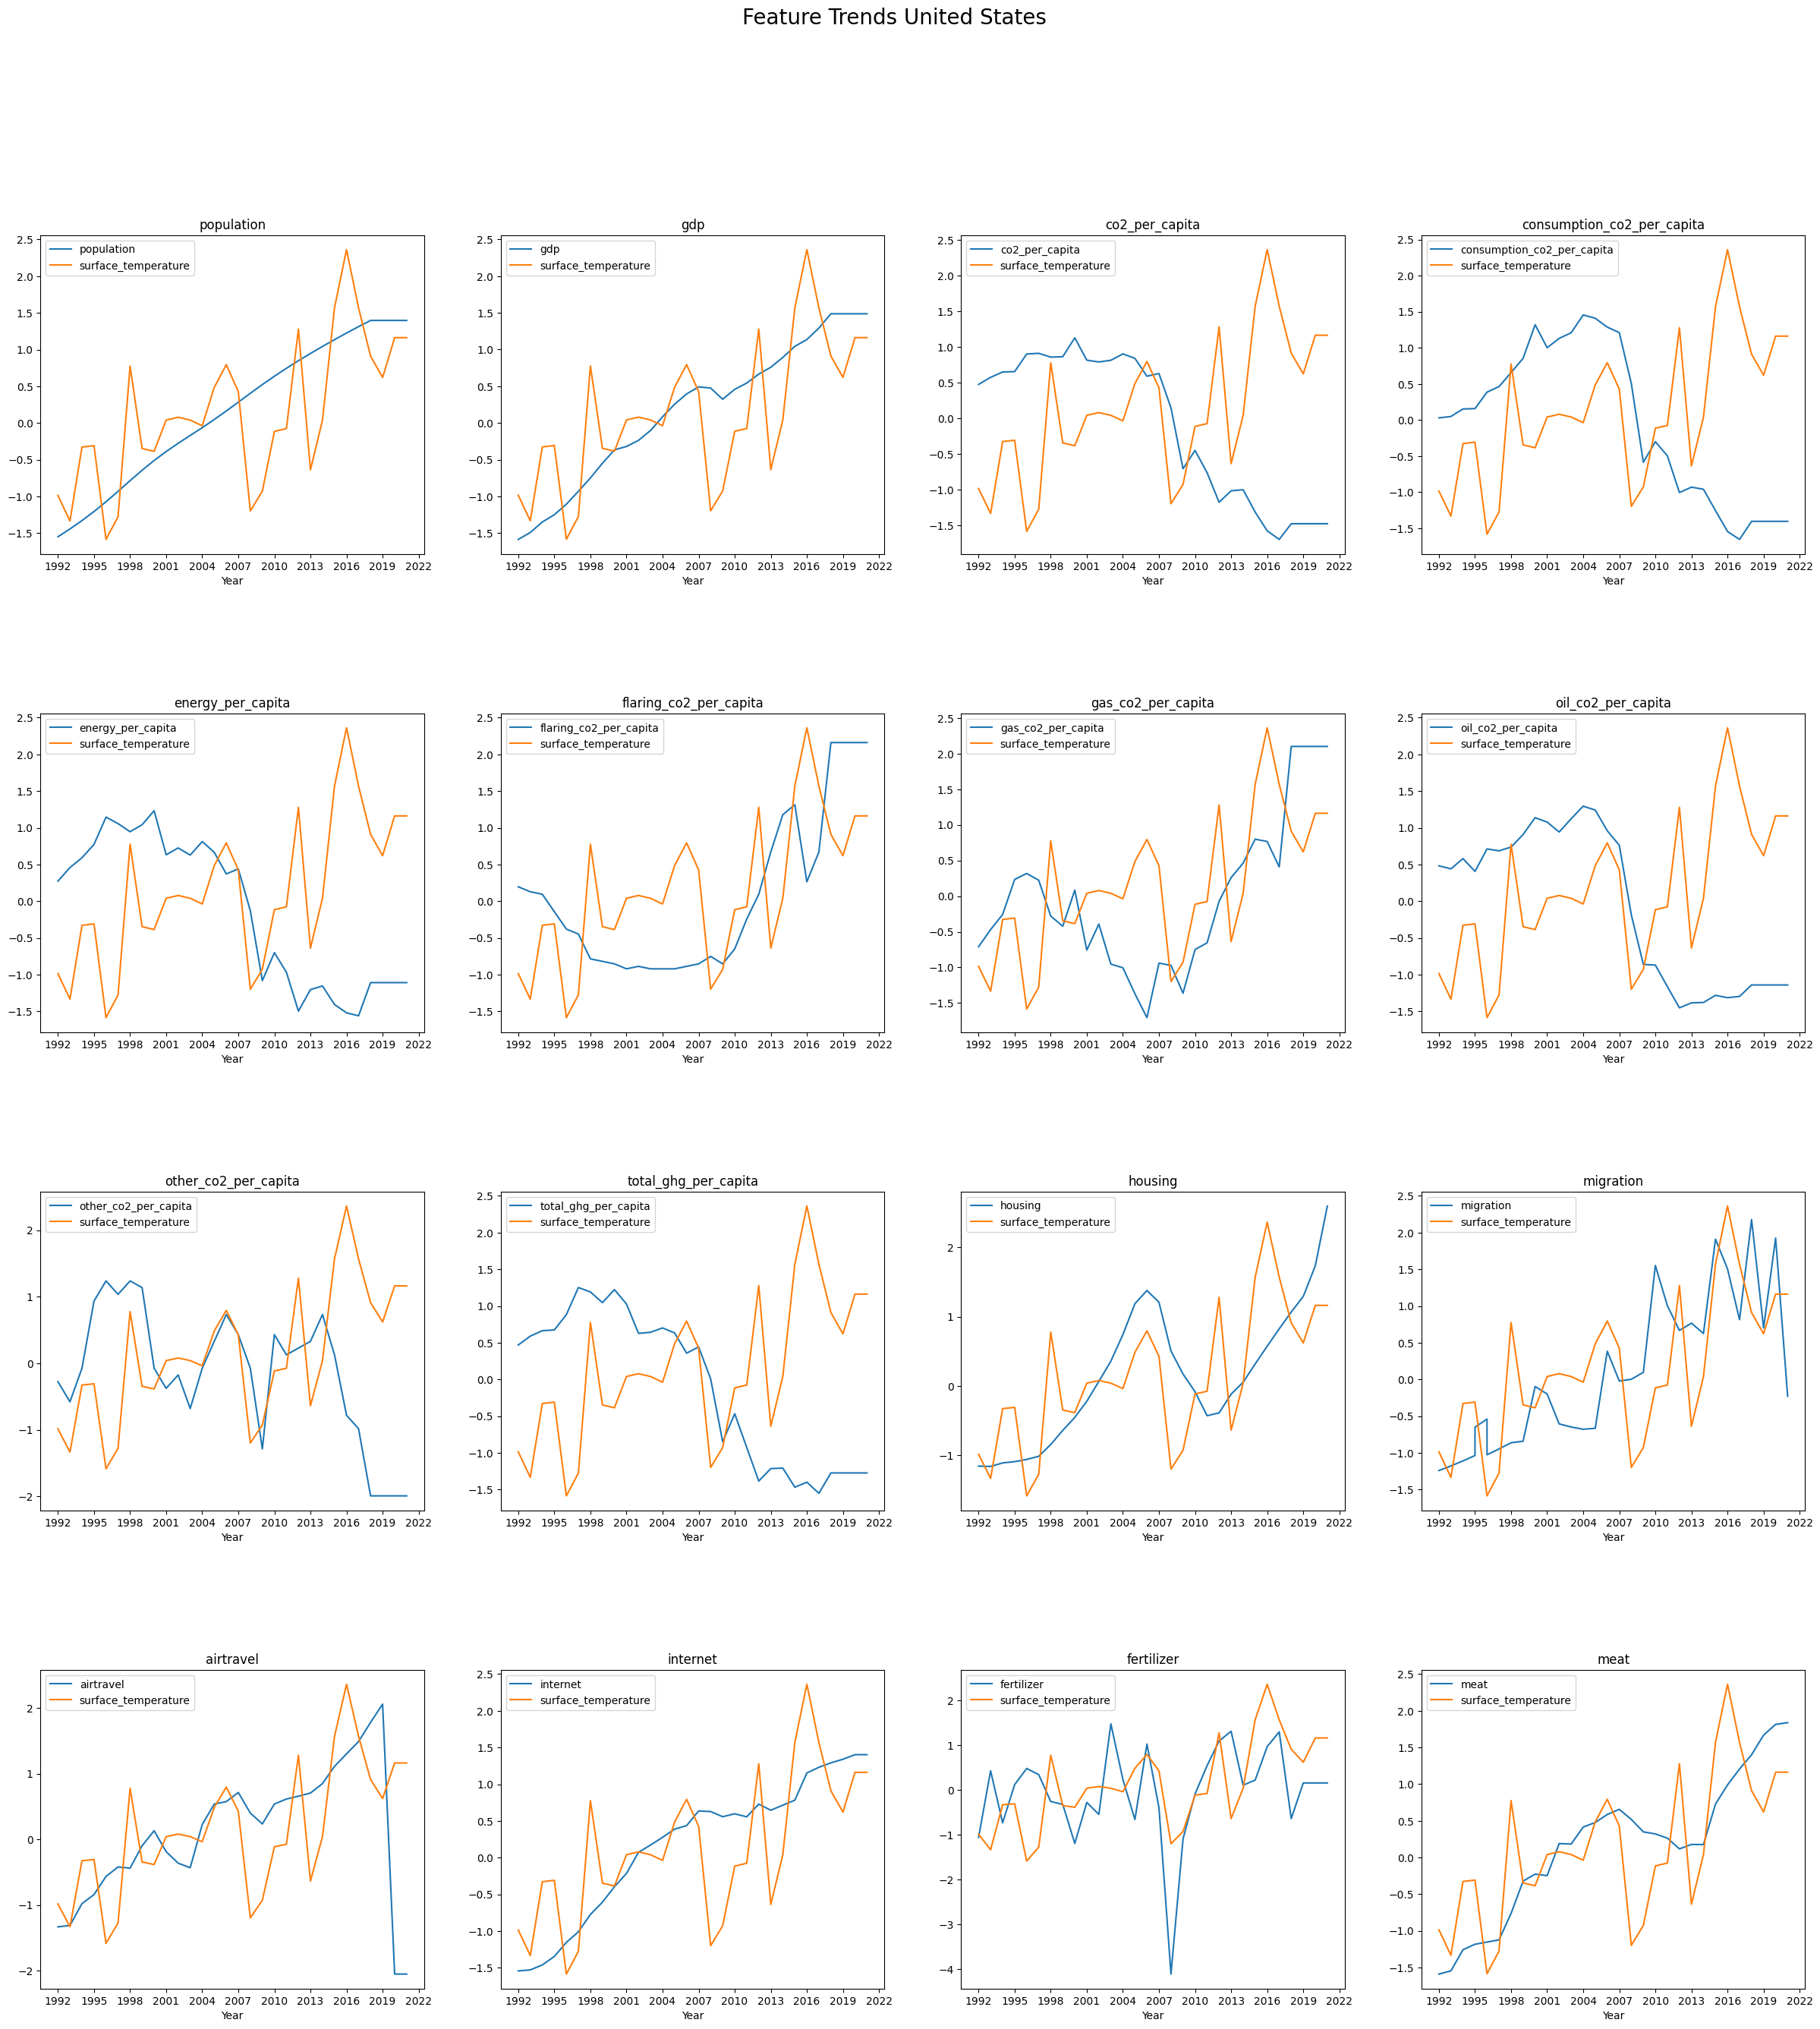

In [59]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Feature Trends United States", fontsize=20)

# loop through the length of tickers and keep track of index
for i, activity in enumerate(human_activities):
    ax = plt.subplot(4, 4, i + 1)
    new_df[["year", activity]].plot(x="year", ax=ax)
    new_df[["year", "surface_temperature"]].plot(x="year", ax=ax)
    ax.set_title(activity)
    ax.get_legend()
    plt.xticks(np.arange(min(new_df['year'].values), max(new_df['year'].values)+2, 3))
    ax.set_xlabel("Year")
plt.savefig('/content/sample_data/feature_trend.png')

### Feature Variance

In [60]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold = (0.1)) 
variance.fit(final_features.iloc[:, 3:]) 
variance.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True])

In [61]:
#Drop the feature flaring_co2_per_capita
final_features = final_features.drop("flaring_co2_per_capita", axis='columns')

### ANOVA f-score

In [62]:
from sklearn.feature_selection import f_classif
f_stats, p_vals = f_classif(final_features.iloc[:, 3:16].values, labels['Average_surface_temperature'])

In [63]:
f_stats

array([3964.93623893,  635.7568831 ,  333.97272946,  172.40419057,
        771.39546817,  341.49673953,  423.60957157,  115.55544165,
        211.24060625,   51.70472041,  752.45759482,   46.61623286,
        526.34902343])

In [64]:
p_vals

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.94084945e-208, 0.00000000e+000, 4.05802167e-194,
       0.00000000e+000])

ValueError: ignored

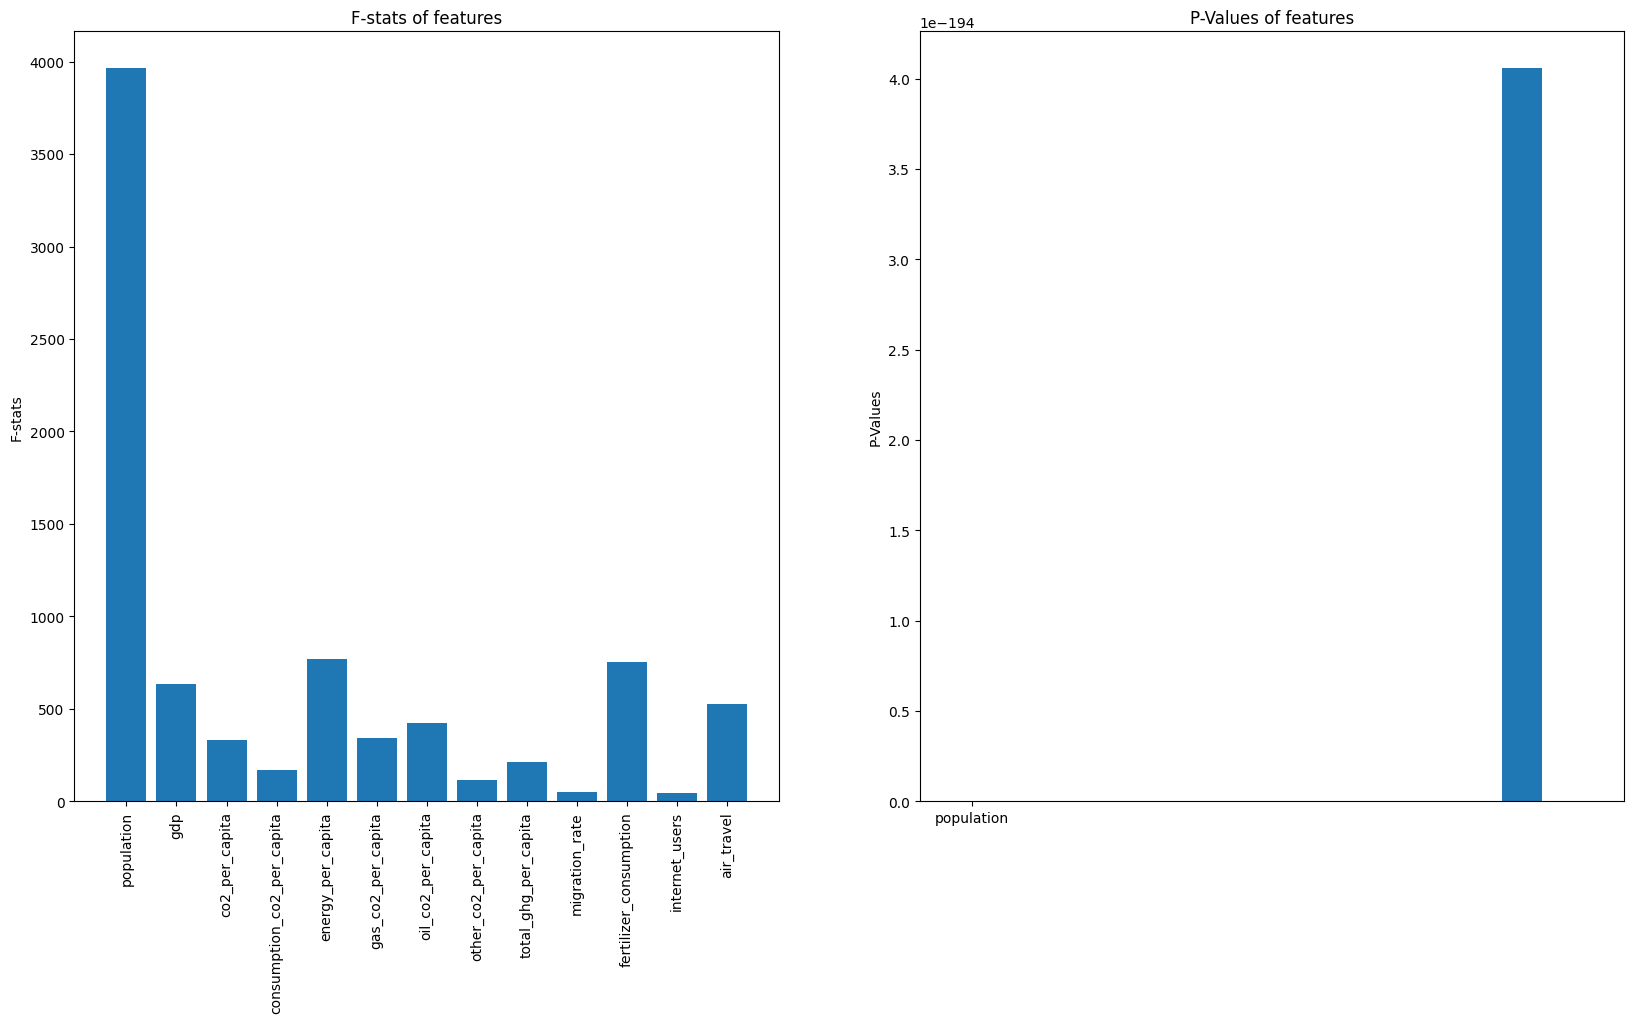

In [65]:
#Z-score normalization of stats plot (normalization necessary?)

import statsmodels.api as sm
import seaborn as sns
from scipy.stats import zscore

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(list(final_features.iloc[:,3:16].columns), list(f_stats), label=list(final_features.iloc[:,3:16].columns)) #add color feature as p-value above 0.05 red
ax2.bar(list(final_features.iloc[:,3:16].columns), list(p_vals), label=list(final_features.iloc[:,3:16].columns))

ax1.set_ylabel('F-stats')
ax1.set_title('F-stats of features')
#ax1.xticks(rotation=90)
ax1.set_xticklabels(list(final_features.iloc[:,3:16].columns), rotation=90)

ax2.set_ylabel('P-Values')
ax2.set_title('P-Values of features')
#ax2.xticks(rotation=90)
ax2.set_xticks(np.arange(min(p_vals), max(p_vals)+1))
ax2.set_xticklabels(list(final_features.iloc[:,3:16].columns), rotation=90)

plt.show()

### Univariate Linear Regression

In [66]:
from sklearn.feature_selection import f_regression
f_stats, p_vals = f_regression(final_features.iloc[:, 3:16].values, labels['Average_surface_temperature'])

In [67]:
f_stats

array([ 19.43449945,   1.74523861,  62.15384814,  46.05064031,
       288.61141748, 204.52720447,  20.85052173,   4.91112613,
         0.79184157,   4.64869717,  28.4626918 ,   4.27395732,
         1.15964801])

In [ ]:
p_vals

array([1.15136745e-05, 1.86772708e-01, 8.12686796e-15, 1.95094693e-11,
       3.44287309e-57, 2.02410192e-42, 5.57111104e-06, 2.69043174e-02,
       3.73753678e-01, 3.13103799e-02, 1.17667606e-07, 3.89524851e-02,
       2.81793177e-01])

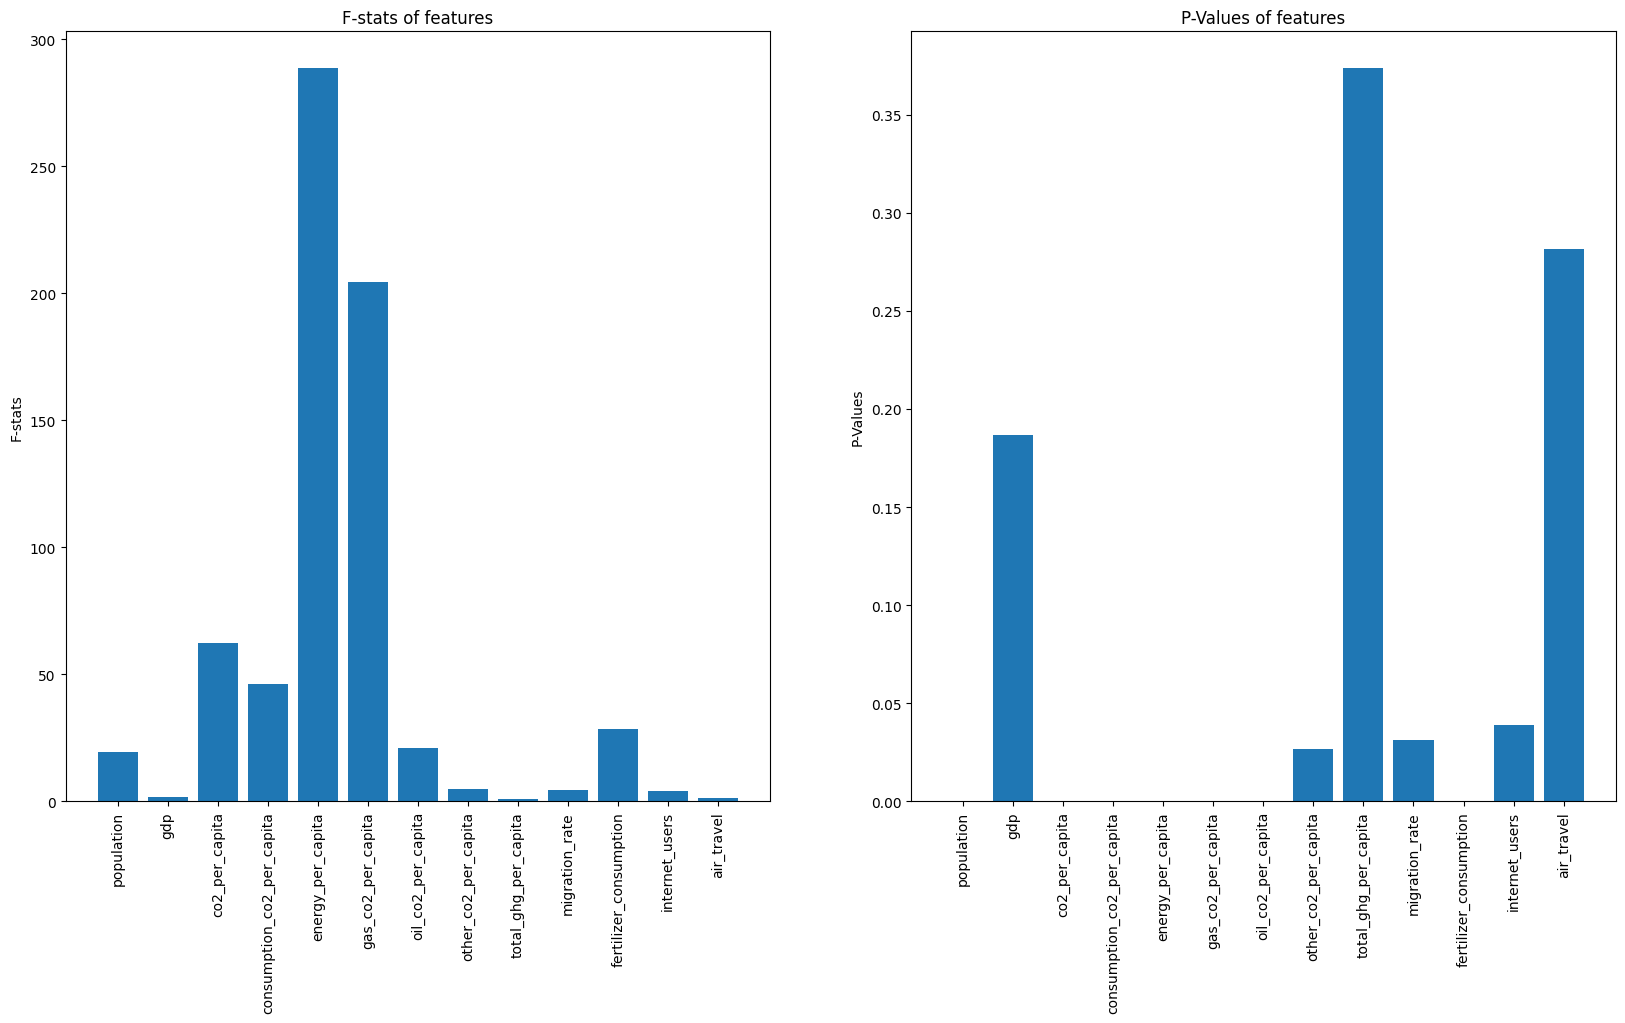

In [68]:
#Z-score normalization of stats plot (normalization necessary?)

import statsmodels.api as sm
import seaborn as sns
from scipy.stats import zscore

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(list(final_features.iloc[:,3:16].columns), list(f_stats), label=list(final_features.iloc[:,3:16].columns)) #add color feature as p-value above 0.05 red
ax2.bar(list(final_features.iloc[:,3:16].columns), list(p_vals), label=list(final_features.iloc[:,3:16].columns))

ax1.set_ylabel('F-stats')
ax1.set_title('F-stats of features')
#ax1.xticks(rotation=90)
ax1.set_xticklabels(list(final_features.iloc[:,3:16].columns), rotation=90)

ax2.set_ylabel('P-Values')
ax2.set_title('P-Values of features')
#ax2.xticks(rotation=90)
ax2.set_xticklabels(list(final_features.iloc[:,3:16].columns), rotation=90)

plt.show()

### Ranking features using Sequential Backward Selection

In [69]:
#complete_data

data = final_features
data['surface_temperature'] = list(labels['Average_surface_temperature'])
data.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,59888.371,1.964,5.084,0.137,31.147822,85322.855120,1546920,308871,23886600.0,909.201,22.04
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,60447.965,2.043,5.178,0.147,30.914816,91269.195816,1643162,348154,26929300.0,909.201,22.04
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,62109.977,2.126,5.277,0.172,30.910987,97629.950301,1864015,397437,26888500.0,909.201,22.04
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,64152.375,2.236,5.395,0.163,31.010807,104434.000000,2004050,496821,28831400.0,909.201,22.04
1578,Australia,AUS,1996,18189274.0,5.745514e+11,17.391,15.022,65320.738,2.217,5.503,0.170,30.648282,144941.000000,2158393,596484,30075100.0,909.201,22.04


In [70]:
import statsmodels.api as sm 

def backward_selection(data):
  features = data.iloc[:, 0:len(data.columns)-1]
  label = data["surface_temperature"]
  f_pval = []
  f_aic = []
  ranked_features = []

  while(True):
    aic, pval = multiple_regression(features, label)
    pval = list(pval[0:len(pval)-1])
    if(len(features.columns) > 1):
      f_eliminate_index = pval.index(max(pval))
      f_pval.append(max(pval))
      f_aic.append(aic)
      ranked_features.append(features.columns[f_eliminate_index])
      del features[features.columns[f_eliminate_index]]
    else:
      ranked_features.append(features.columns[0])
      f_pval.append(max(pval))
      f_aic.append(aic)
      break
  
  print(f_pval)
  plot_stat(f_pval, ranked_features, "p-values")
  plot_stat(f_aic, ranked_features, "aic scores")

In [71]:
def multiple_regression(features, label):
  regcorr = sm.OLS(label, sm.add_constant(features))
  stats = regcorr.fit()
  return stats.aic, stats.pvalues

In [72]:
def plot_stat(stat, feature_labels, stat_name):
  fig = plt.figure(figsize = (10, 5))
 
  plt.bar(feature_labels, stat)
  plt.xticks(feature_labels, feature_labels, rotation='vertical')
  plt.ylabel(stat_name)
  plt.title("Stat Trend for " + stat_name)
  plt.show()

[0.7999942276309223, 0.915188197288077, 0.9924343876683818, 0.04982142465679506, 0.09570922181556217, 0.24235995549019468, 0.9743693270716086, 0.7564668515077826, 0.7824597400963137, 0.9064411544005124, 0.16287437948721994, 3.038905074901644e-06, 5.96484249143654e-07, 2.1537141972409845e-257]


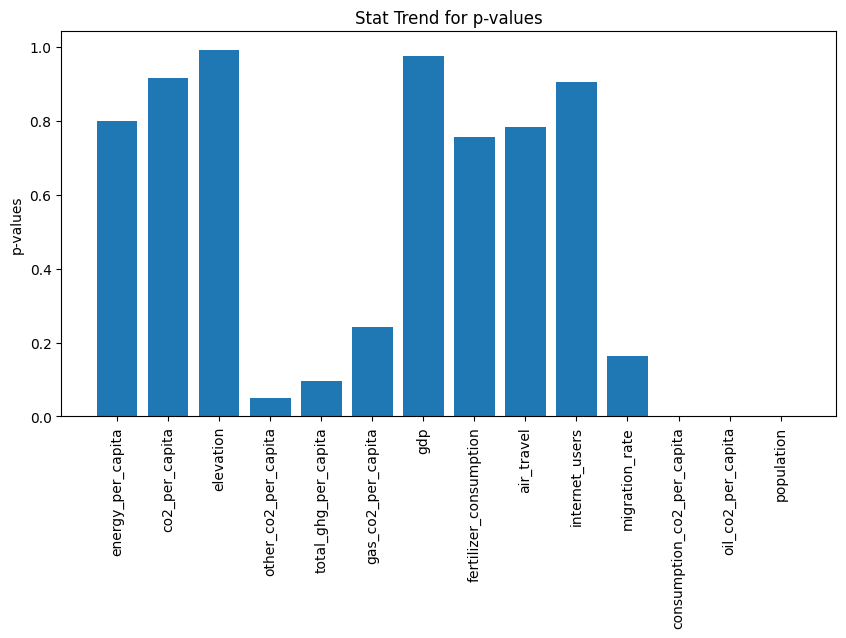

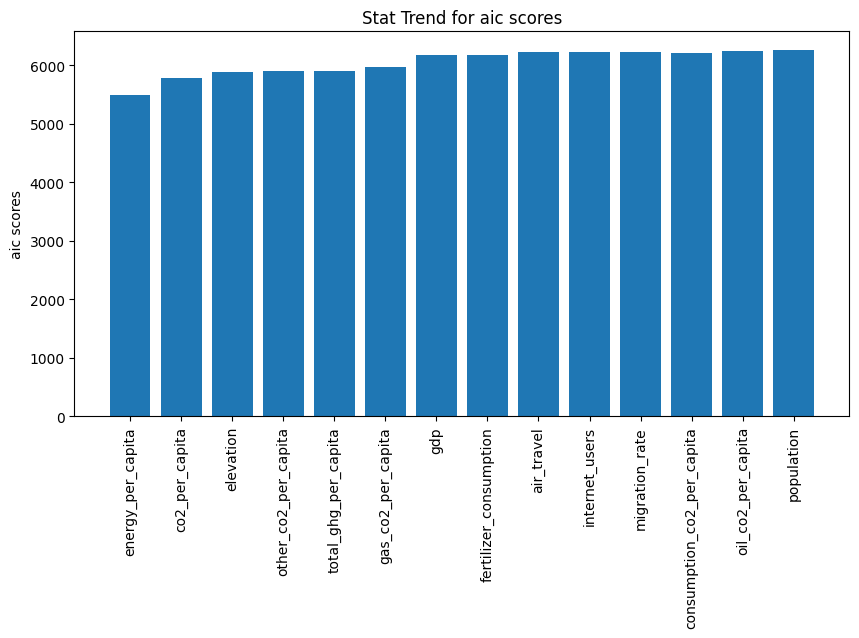

In [73]:
backward_selection(data.iloc[:,3:])

### Pearson Correlation Matrix

#### Heatmap

In [74]:
features_cor=final_features.corr() 
features_cor

,year,population,gdp,co2_per_capita,consumption_co2_per_capita,energy_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,total_ghg_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
year,1.000000,0.006974,0.074841,-0.060722,0.025956,0.025594,0.081591,-0.040888,-0.011672,-0.090229,0.341163,0.004818,0.298722,0.092613,-0.000194,-0.011739
population,0.006974,1.000000,0.885953,0.200445,0.056316,0.110048,0.250880,0.114240,-0.143638,0.203363,0.269039,0.896734,0.798360,0.796177,-0.020559,0.136738
gdp,0.074841,0.885953,1.000000,0.367126,0.247595,0.284294,0.317169,0.289742,-0.064777,0.277295,0.208126,0.887201,0.883606,0.965843,-0.058784,0.041329
co2_per_capita,-0.060722,0.200445,0.367126,1.000000,0.791717,0.758951,0.623371,0.731871,0.447386,0.852980,-0.159721,0.288642,0.240678,0.397816,-0.203970,-0.239657
consumption_co2_per_capita,0.025956,0.056316,0.247595,0.791717,1.000000,0.701279,0.485030,0.841737,0.326761,0.633137,-0.194522,0.149193,0.152164,0.284477,-0.057505,-0.207840
energy_per_capita,0.025594,0.110048,0.284294,0.758951,0.701279,1.000000,0.624036,0.751749,0.304295,0.642130,-0.207841,0.217911,0.188726,0.312379,-0.048456,-0.469625
gas_co2_per_capita,0.081591,0.250880,0.317169,0.623371,0.485030,0.624036,1.000000,0.466165,0.274341,0.556151,0.010467,0.253635,0.267662,0.319442,-0.230572,-0.408687
oil_co2_per_capita,-0.040888,0.114240,0.289742,0.731871,0.841737,0.751749,0.466165,1.000000,0.232885,0.631622,-0.201585,0.222119,0.169765,0.325122,0.013010,-0.141535
other_co2_per_capita,-0.011672,-0.143638,-0.064777,0.447386,0.326761,0.304295,0.274341,0.232885,1.000000,0.374967,-0.137405,-0.077655,-0.089900,-0.036959,-0.076988,-0.069223
total_ghg_per_capita,-0.090229,0.203363,0.277295,0.852980,0.633137,0.642130,0.556151,0.631622,0.374967,1.000000,-0.167615,0.302581,0.186410,0.314356,-0.183652,-0.027852


<Axes: >

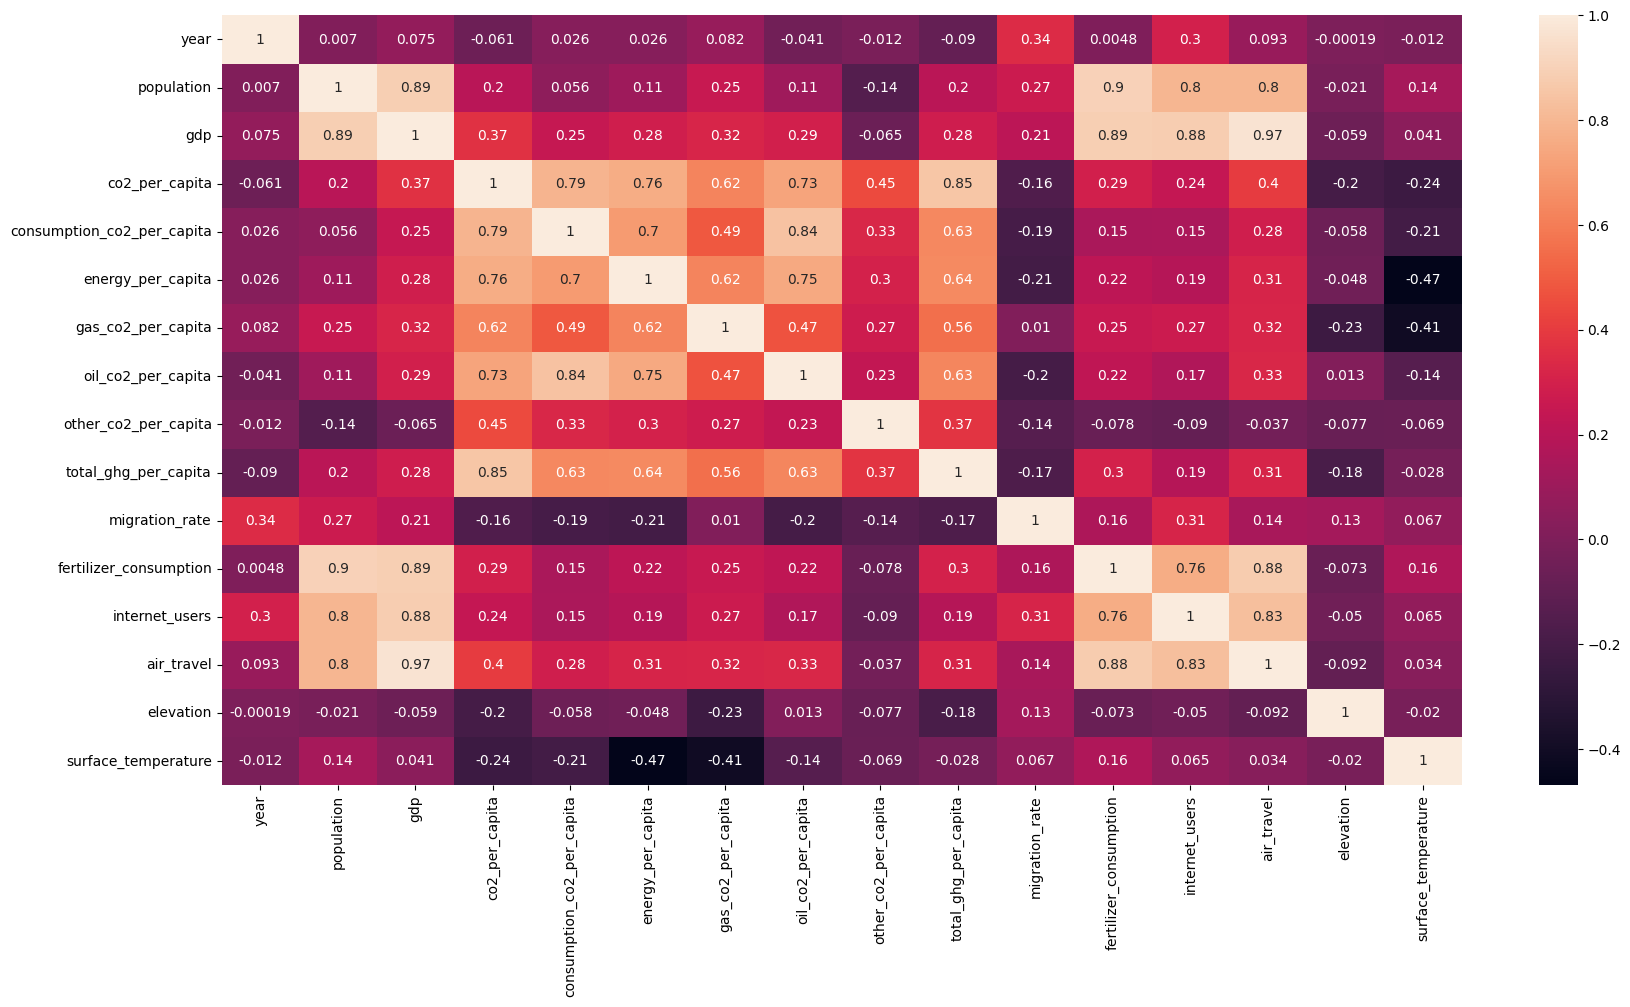

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(20,10)) 
sns.heatmap(features_cor, annot=True)

#### Country-wise feature subplots

In [76]:
#Important features: population, co2_per_capita, gdp, surface_temperature
new_df = data[["year", "country", "co2_per_capita", "migration_rate", "air_travel", "fertilizer_consumption", "surface_temperature"]]
new_df.head()

,year,country,co2_per_capita,migration_rate,air_travel,fertilizer_consumption,surface_temperature
1574,1992,Australia,16.454,85322.855120,23886600.0,1546920,22.04
1575,1993,Australia,16.549,91269.195816,26929300.0,1643162,22.04
1576,1994,Australia,16.860,97629.950301,26888500.0,1864015,22.04
1577,1995,Australia,17.119,104434.000000,28831400.0,2004050,22.04
1578,1996,Australia,17.391,144941.000000,30075100.0,2158393,22.04


In [77]:
new_df["co2_per_capita"] = (new_df["co2_per_capita"] - new_df["co2_per_capita"].mean())/new_df["co2_per_capita"].std()
new_df["migration_rate"] = (new_df["migration_rate"] - new_df["migration_rate"].mean())/new_df["migration_rate"].std()
new_df["air_travel"] = (new_df["air_travel"] - new_df["air_travel"].mean())/new_df["air_travel"].std()
new_df["fertilizer_consumption"] = (new_df["fertilizer_consumption"] - new_df["fertilizer_consumption"].mean())/new_df["fertilizer_consumption"].std()
new_df["surface_temperature"] = (new_df["surface_temperature"] - new_df["surface_temperature"].mean())/new_df["surface_temperature"].std()
new_df.head()

,year,country,co2_per_capita,migration_rate,air_travel,fertilizer_consumption,surface_temperature
1574,1992,Australia,1.789202,-0.783037,-0.147646,-0.098844,2.387983
1575,1993,Australia,1.811449,-0.778534,-0.120018,-0.074298,2.387983
1576,1994,Australia,1.884277,-0.773719,-0.120388,-0.017971,2.387983
1577,1995,Australia,1.944927,-0.768567,-0.102747,0.017744,2.387983
1578,1996,Australia,2.008622,-0.737899,-0.091454,0.057108,2.387983


In [78]:
countries = list(new_df["country"].unique())

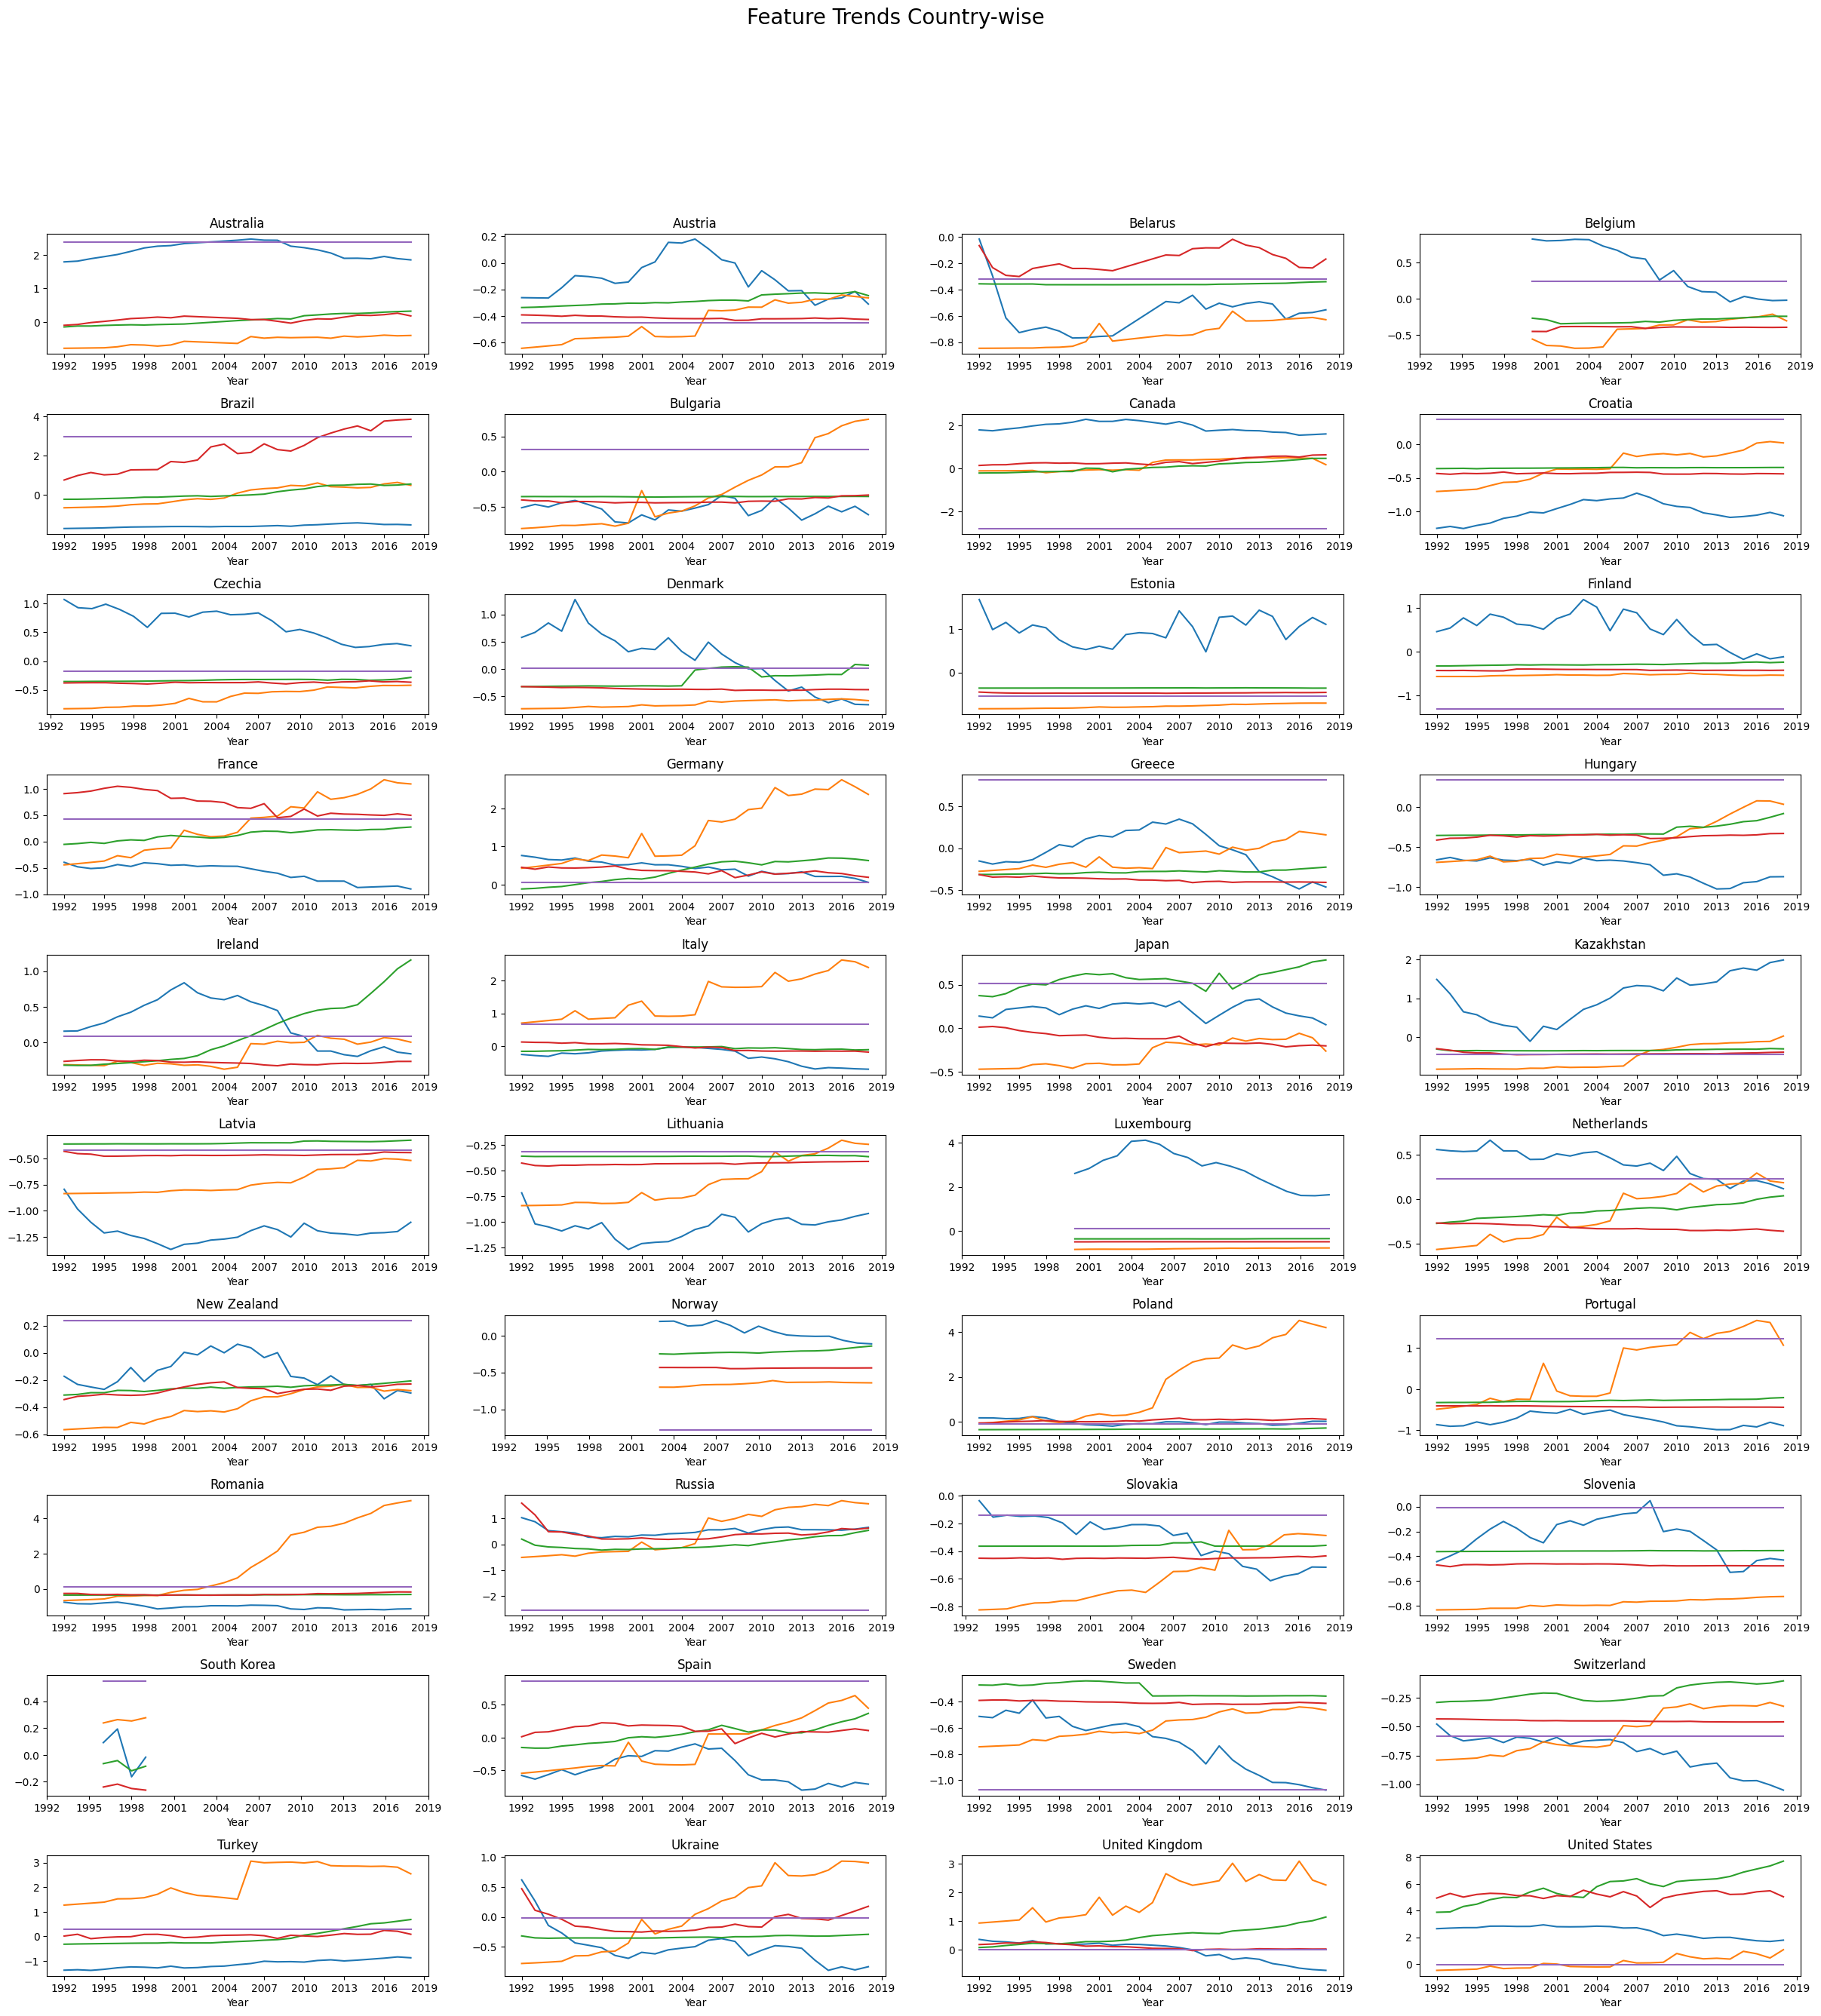

In [79]:
#Check how to save the image
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Feature Trends Country-wise", fontsize=20)

# loop through the length of tickers and keep track of index
for i, country in enumerate(countries):
    ax = plt.subplot(10, 4, i + 1)
    new_df[new_df["country"] == country].plot(x="year", ax=ax)

    ax.set_title(country)
    ax.get_legend().remove()
    ax.set_xlabel("Year")
    ax.set_xticks(np.arange(min(new_df['year'].values), max(new_df['year'].values)+2, 3))

plt.savefig('/content/sample_data/country_trend.png')

#### Mutual Information Based Feature Selection

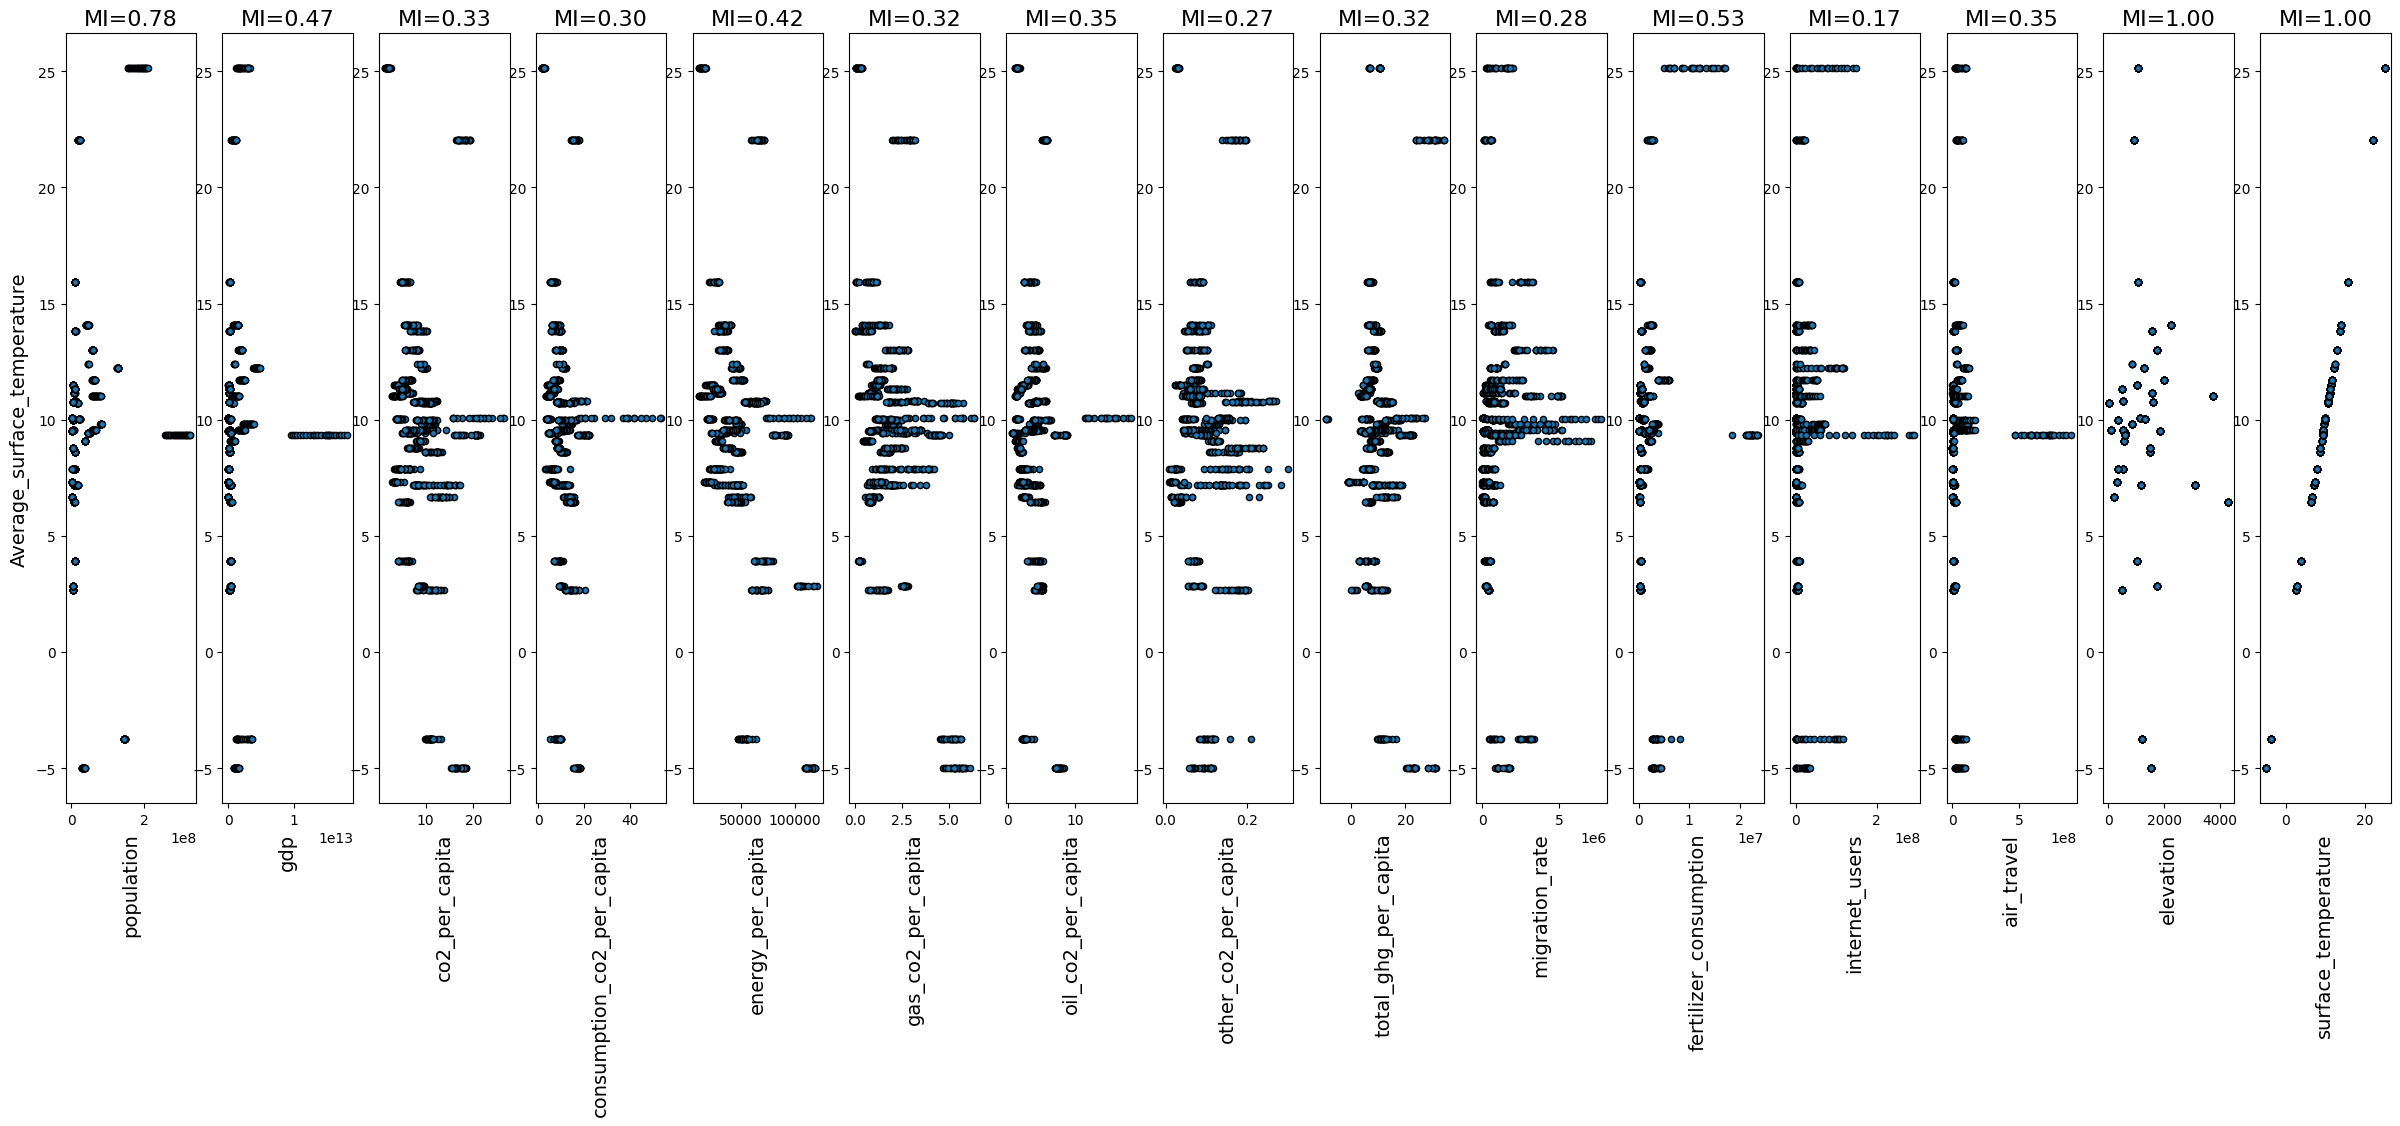

In [80]:
from sklearn.feature_selection import mutual_info_regression

X = final_features.iloc[:, 3:].values
Y = labels['Average_surface_temperature']

mi = mutual_info_regression(X, Y)
mi /= np.max(mi)

plt.figure(figsize=(30,10))
for i in range(len(final_features.iloc[:, 3:].columns)):
    plt.subplot(1, len(final_features.iloc[:, 3:].columns), i + 1)
    plt.scatter(X[:, i], Y, edgecolor="black", s=20)
    plt.xlabel(final_features.iloc[:, 3:].columns[i].format(i + 1), fontsize=14, rotation=90)
    if i == 0:
        plt.ylabel("Average_surface_temperature", fontsize=14)
    plt.title("MI={:.2f}".format(mi[i]), fontsize=16)
plt.show()

In [81]:
ind_list = [i[0] for i in sorted(enumerate(mi), key=lambda k: k[1], reverse=True)]
ranked_features = [final_features.iloc[:, 3:].columns[i] for i in ind_list]

In [82]:
for i in ind_list:
  print(final_features.iloc[:, 3:].columns[i] + ' : ' + str(mi[i]))

elevation : 1.0
surface_temperature : 0.997130649868724
population : 0.7757849944782425
fertilizer_consumption : 0.5254737710726098
gdp : 0.47433963453023786
energy_per_capita : 0.4199475871334462
air_travel : 0.352363733117413
oil_co2_per_capita : 0.34806433774019907
co2_per_capita : 0.32702482291652846
gas_co2_per_capita : 0.3209781324646846
total_ghg_per_capita : 0.3172821912464078
consumption_co2_per_capita : 0.30400717774011016
migration_rate : 0.28312033179148316
other_co2_per_capita : 0.27348702470601866
internet_users : 0.1667197232858086


In [83]:
#Removing features
#final_features = final_features.drop("flaring_co2_per_capita", axis='columns')
final_features = final_features.drop("total_ghg_per_capita", axis='columns')
final_features = final_features.drop("energy_per_capita", axis='columns')

## Modeling

#### Decision Tree for regression

In [84]:
#complete_data

data = final_features.copy()
data['surface_temperature'] = list(labels['Average_surface_temperature'])
data.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,1.964,5.084,0.137,85322.855120,1546920,308871,23886600.0,909.201,22.04
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,2.043,5.178,0.147,91269.195816,1643162,348154,26929300.0,909.201,22.04
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,2.126,5.277,0.172,97629.950301,1864015,397437,26888500.0,909.201,22.04
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,2.236,5.395,0.163,104434.000000,2004050,496821,28831400.0,909.201,22.04
1578,Australia,AUS,1996,18189274.0,5.745514e+11,17.391,15.022,2.217,5.503,0.170,144941.000000,2158393,596484,30075100.0,909.201,22.04


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train.reshape(-1,1))

y_pred = regressor.predict(X_test)

eval_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(eval_df['Real Values'],eval_df['Predicted Values'])

5.5675375426175255e-30

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(eval_df['Real Values'],eval_df['Predicted Values'])

1.4088247176725553e-14

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

rfr = RandomForestRegressor(max_depth=15)
cv = model_selection.KFold(n_splits=3)
rfr.fit(X_train, Y_train)

Y_pred = rfr.predict(X_test)

print(mean_squared_error(Y_test, Y_pred))
print(mape(Y_test, Y_pred))

#eval_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

0.5557318833490679
3.9238563971667473


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

rfr = RandomForestRegressor(max_depth=15)
cv = model_selection.KFold(n_splits=3)

mse_val = 0
mape_val = 0
count=0

for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  rfr.fit(X_train, Y_train)

    # Default metric is R2 for regression, which can be accessed by score()
  rfr.score(X_test, Y_test)

  # For other metrics, we need the predictions of the model
  Y_pred = rfr.predict(X_test)

  mse_val+=mean_squared_error(Y_test, Y_pred)
  mape_val+=mape(Y_test, Y_pred)
  count+=1

print(mse_val/count)
print(mape_val/count)

In [ ]:
mean_squared_error(eval_df['Real Values'],eval_df['Predicted Values'])

0.6182480769230769

In [ ]:
mape(eval_df['Real Values'],eval_df['Predicted Values'])

1.1381885338044189

#### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn import model_selection

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

model = SVR(kernel = 'rbf')
cv = model_selection.KFold(n_splits=3)


for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  model.fit(X_train, Y_train)

    # Default metric is R2 for regression, which can be accessed by score()
  model.score(X_test, Y_test)

  # For other metrics, we need the predictions of the model
  Y_pred = model.predict(X_test)

  print(mean_squared_error(Y_test, Y_pred))
  print(mape(Y_test, Y_pred))
  print('------------------------------')

52.51948641367512
66.88415885505532
------------------------------
6.462883436970072
27.178063357405417
------------------------------
27.00768743252135
59.219889325707534
------------------------------


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values.reshape(-1,1)

new_X = StandardScaler()
new_y = StandardScaler()
X = new_X.fit_transform(X)
Y = new_y.fit_transform(Y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.reshape(-1,1))

y_pred = regressor.predict(X_test).reshape(-1,1)
y_pred = new_y.inverse_transform(y_pred)

print(y_pred.reshape(-1).shape)
print(new_y.inverse_transform(y_test.reshape(-1,1)).reshape(-1).shape)

eval_df = pd.DataFrame({'Real Values':new_y.inverse_transform(y_test.reshape(-1,1)).reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

(52,)
(52,)


In [ ]:
mean_squared_error(eval_df['Real Values'],eval_df['Predicted Values'])

2.3169165499394477

In [ ]:
mape(eval_df['Real Values'],eval_df['Predicted Values'])

10.901512080066198

#### Lasso Regression

In [ ]:
from sklearn import linear_model
from sklearn import model_selection

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

lasso = linear_model.Lasso(alpha=0.005)
cv = model_selection.KFold(n_splits=3)


for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  lasso.fit(X_train, Y_train)

    # Default metric is R2 for regression, which can be accessed by score()
  lasso.score(X_test, Y_test)

  # For other metrics, we need the predictions of the model
  Y_pred = lasso.predict(X_test)

  print(mean_squared_error(Y_test, Y_pred))
  print(mape(Y_test, Y_pred))
  print('------------------------------')

96.79749010639485
67.18180441282679
------------------------------
44.83481372967382
49.25040665507554
------------------------------
41.10451650285816
73.64816543809111
------------------------------


In [ ]:
from sklearn import linear_model

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

lassoReg = linear_model.Lasso(alpha=0.005)
lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

eval_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [ ]:
mean_squared_error(eval_df['Real Values'],eval_df['Predicted Values'])

23.0272990077797

In [ ]:
mape(eval_df['Real Values'],eval_df['Predicted Values'])

45.21226520736407

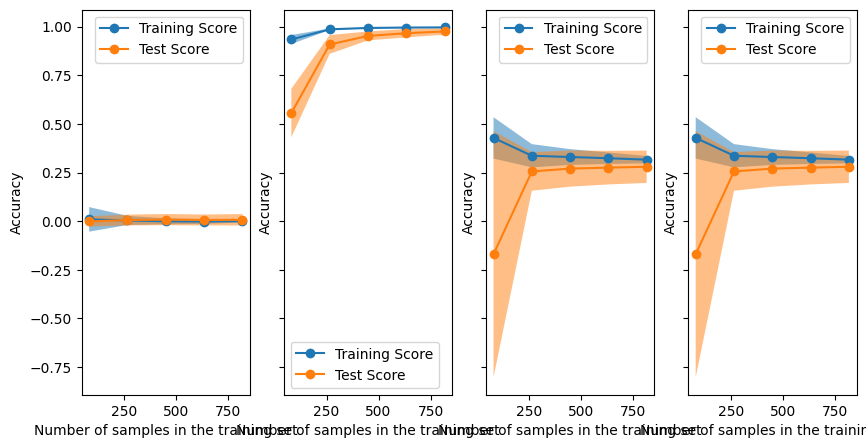

In [ ]:
#Loss Curves

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), sharey=True)

common_params = {
    "X": X,
    "y": Y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([regressor, rfr, model, lasso]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])

#### LSTM

In [ ]:
!pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.0 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.18.1-py3-none-any.whl size=109695 sha256=8e27a8c7e34287e5061bcb0f2240012d0878680e7435bd6aaf8e26a38b5b6989
  Stored in directory: /root/.cache/pip/wheels/8c/ee/27/2c315bf4ddd3f52b27e6e8583e31aa362f365764be7c3668de
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=3d526d04f2ff5db933f98803462492c9fe1447dc13e9190796c43f55c0ffa113
  

In [ ]:
import pickle
import seaborn as sns
from scalecast.Forecaster import Forecaster

In [ ]:
data.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
1574,Australia,AUS,1992,17402180.0,4.778432e+11,16.454,14.353,1.964,5.084,0.137,85322.855120,1546920,308871,23886600.0,909.201,22.04
1575,Australia,AUS,1993,17603210.0,5.008406e+11,16.549,14.276,2.043,5.178,0.147,91269.195816,1643162,348154,26929300.0,909.201,22.04
1576,Australia,AUS,1994,17798526.0,5.273462e+11,16.860,14.755,2.126,5.277,0.172,97629.950301,1864015,397437,26888500.0,909.201,22.04
1577,Australia,AUS,1995,17993082.0,5.491729e+11,17.119,14.780,2.236,5.395,0.163,104434.000000,2004050,496821,28831400.0,909.201,22.04
1578,Australia,AUS,1996,18189274.0,5.745514e+11,17.391,15.022,2.217,5.503,0.170,144941.000000,2158393,596484,30075100.0,909.201,22.04


In [ ]:
data.to_csv('/content/sample_data/final_data.csv', index=False)

In [ ]:
df = pd.read_csv('/content/sample_data/final_data.csv', parse_dates=['year'])
df.head()

,country,iso_code,year,population,gdp,co2_per_capita,consumption_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
0,Australia,AUS,1992-01-01,17402180.0,4.778432e+11,16.454,14.353,1.964,5.084,0.137,85322.855120,1546920,308871,23886600.0,909.201,22.04
1,Australia,AUS,1993-01-01,17603210.0,5.008406e+11,16.549,14.276,2.043,5.178,0.147,91269.195816,1643162,348154,26929300.0,909.201,22.04
2,Australia,AUS,1994-01-01,17798526.0,5.273462e+11,16.860,14.755,2.126,5.277,0.172,97629.950301,1864015,397437,26888500.0,909.201,22.04
3,Australia,AUS,1995-01-01,17993082.0,5.491729e+11,17.119,14.780,2.236,5.395,0.163,104434.000000,2004050,496821,28831400.0,909.201,22.04
4,Australia,AUS,1996-01-01,18189274.0,5.745514e+11,17.391,15.022,2.217,5.503,0.170,144941.000000,2158393,596484,30075100.0,909.201,22.04


In [ ]:
df = df.drop(columns=["country", "iso_code"])
df.head()

,year,population,gdp,co2_per_capita,consumption_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,migration_rate,fertilizer_consumption,internet_users,air_travel,elevation,surface_temperature
0,1992-01-01,17402180.0,4.778432e+11,16.454,14.353,1.964,5.084,0.137,85322.855120,1546920,308871,23886600.0,909.201,22.04
1,1993-01-01,17603210.0,5.008406e+11,16.549,14.276,2.043,5.178,0.147,91269.195816,1643162,348154,26929300.0,909.201,22.04
2,1994-01-01,17798526.0,5.273462e+11,16.860,14.755,2.126,5.277,0.172,97629.950301,1864015,397437,26888500.0,909.201,22.04
3,1995-01-01,17993082.0,5.491729e+11,17.119,14.780,2.236,5.395,0.163,104434.000000,2004050,496821,28831400.0,909.201,22.04
4,1996-01-01,18189274.0,5.745514e+11,17.391,15.022,2.217,5.503,0.170,144941.000000,2158393,596484,30075100.0,909.201,22.04


In [ ]:
f = Forecaster(y=df['surface_temperature'],
                   current_dates=df['year'])

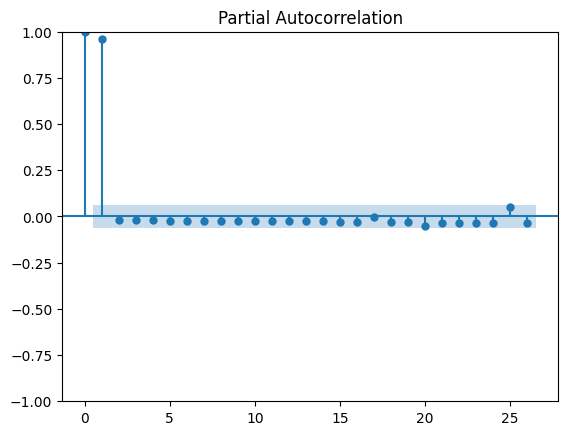

In [ ]:
f.plot_pacf(lags=26)
plt.show() #Result: statistically significant correlation may exist up to two years

In [ ]:
f.set_test_length(5)
f.generate_future_dates(5)
f.set_estimator('lstm')

32/32 [==============================] - 0s 2ms/step


<Axes: xlabel='Date', ylabel='Values'>

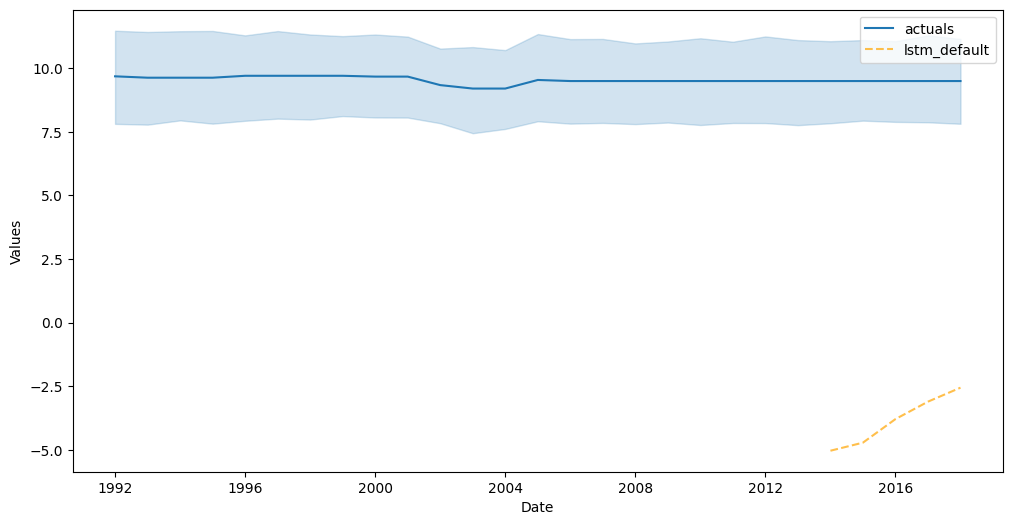

In [ ]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

Epoch 1/15
25/25 [==============================] - 13s 168ms/step - loss: 0.1866 - val_loss: 0.0676
Epoch 2/15
25/25 [==============================] - 2s 100ms/step - loss: 0.1071 - val_loss: 0.0688
Epoch 3/15
25/25 [==============================] - 3s 119ms/step - loss: 0.1047 - val_loss: 0.0871
Epoch 4/15
25/25 [==============================] - 4s 167ms/step - loss: 0.1125 - val_loss: 0.0743
Epoch 5/15
25/25 [==============================] - 3s 101ms/step - loss: 0.1023 - val_loss: 0.0544
Epoch 6/15
25/25 [==============================] - 3s 100ms/step - loss: 0.0881 - val_loss: 0.0437
Epoch 7/15
25/25 [==============================] - 3s 106ms/step - loss: 0.0751 - val_loss: 0.0792
Epoch 8/15
25/25 [==============================] - 3s 109ms/step - loss: 0.0758 - val_loss: 0.0520
Epoch 9/15
25/25 [==============================] - 4s 168ms/step - loss: 0.0734 - val_loss: 0.0410
Epoch 10/15
25/25 [==============================] - 3s 104ms/step - loss: 0.0661 - val_loss: 0.047

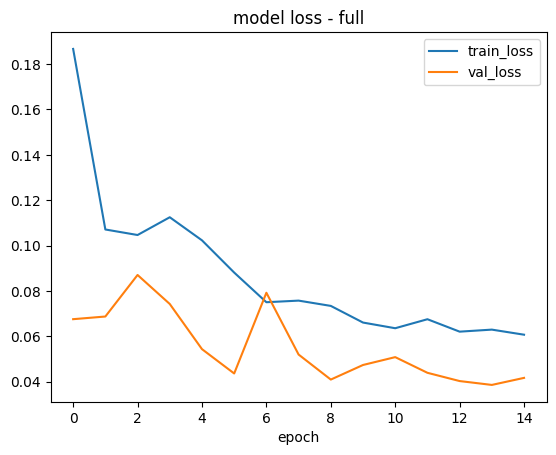

Epoch 1/15
25/25 [==============================] - 15s 226ms/step - loss: 0.1907 - val_loss: 0.0784
Epoch 2/15
25/25 [==============================] - 3s 133ms/step - loss: 0.1120 - val_loss: 0.0709
Epoch 3/15
25/25 [==============================] - 4s 161ms/step - loss: 0.1070 - val_loss: 0.0829
Epoch 4/15
25/25 [==============================] - 3s 105ms/step - loss: 0.0981 - val_loss: 0.0821
Epoch 5/15
25/25 [==============================] - 3s 105ms/step - loss: 0.0961 - val_loss: 0.0491
Epoch 6/15
25/25 [==============================] - 3s 106ms/step - loss: 0.0876 - val_loss: 0.0560
Epoch 7/15
25/25 [==============================] - 4s 142ms/step - loss: 0.0746 - val_loss: 0.0533
Epoch 8/15
25/25 [==============================] - 4s 151ms/step - loss: 0.0677 - val_loss: 0.0468
Epoch 9/15
25/25 [==============================] - 3s 106ms/step - loss: 0.0681 - val_loss: 0.0452
Epoch 10/15
25/25 [==============================] - 3s 105ms/step - loss: 0.0655 - val_loss: 0.045

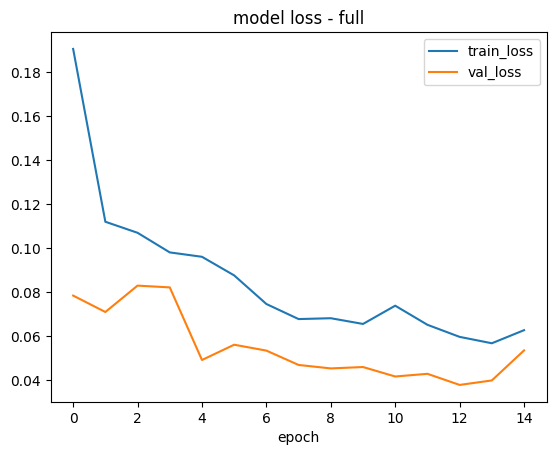

ValueError: ignored

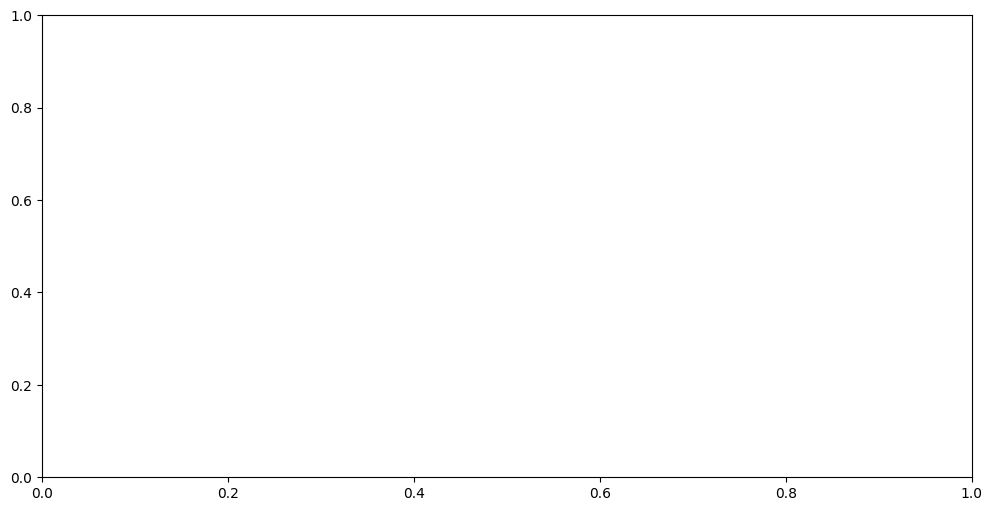

In [ ]:
f.manual_forecast(call_me='lstm',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
f.test()

1/1 [==============================] - 1s 715ms/step


In [ ]:
f.export(dfs=['model_summaries', 'lvl_test_set_predictions', 'lvl_fcsts'], models='all', best_model='auto', determine_best_by=None, cis=False, to_excel=False, out_path='./', excel_name='results.xlsx')

{'model_summaries':   ModelNickname Estimator Xvars  \
 0  lstm_default      lstm  None   
 1          lstm      lstm  None   
 
                                          HyperParams  Observations  \
 0                                                 {}          1022   
 1  {'batch_size': 32, 'epochs': 15, 'validation_s...          1022   
 
    DynamicallyTested  TestSetLength  CILevel  ValidationMetric  \
 0               True              5      NaN               NaN   
 1               True              5      NaN               NaN   
 
    ValidationMetricValue  ...  weights  best_model  InSampleRMSE  \
 0                    NaN  ...      NaN        True     13.589747   
 1                    NaN  ...      NaN       False      2.793699   
 
    InSampleMAPE  InSampleMAE  InSampleR2  TestSetRMSE  TestSetMAPE  \
 0      1.315745    12.749948   -5.804732    13.233799     1.410321   
 1      0.282876     1.927523    0.680978    13.134010     1.402045   
 
    TestSetMAE  TestSetR2  
 

<Axes: xlabel='Date', ylabel='Values'>

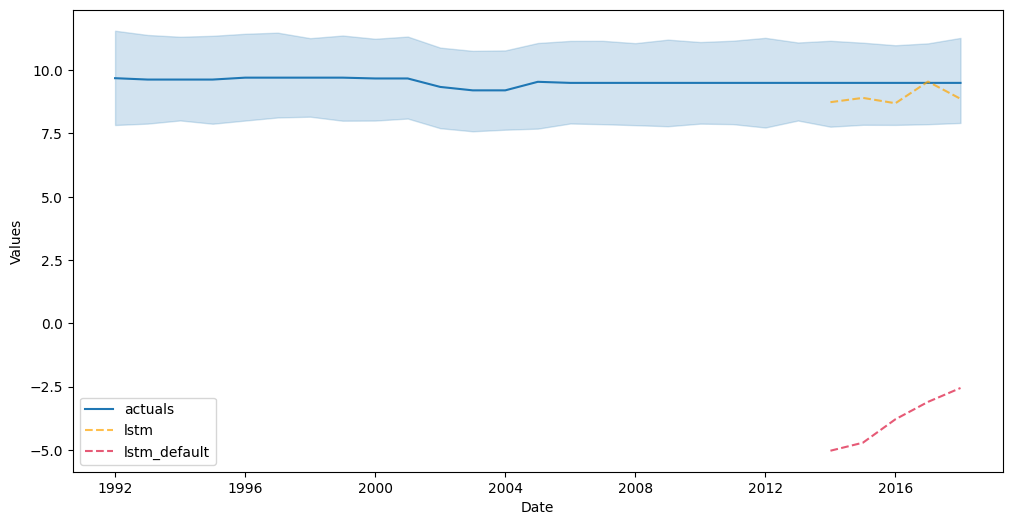

In [ ]:
f.plot_test_set(order_by='TestSetMAPE',models='top_2',ci=True)

#### Version 2 - Dropping last 3 features ranked by the feature selection step

In [ ]:
df = df.drop(columns=["population","gdp","internet_users"])
df.head()

,year,co2_per_capita,consumption_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,migration_rate,fertilizer_consumption,air_travel,elevation,surface_temperature
0,1992-01-01,16.454,14.353,1.964,5.084,0.137,85322.855120,1546920,23886600.0,909.201,22.04
1,1993-01-01,16.549,14.276,2.043,5.178,0.147,91269.195816,1643162,26929300.0,909.201,22.04
2,1994-01-01,16.860,14.755,2.126,5.277,0.172,97629.950301,1864015,26888500.0,909.201,22.04
3,1995-01-01,17.119,14.780,2.236,5.395,0.163,104434.000000,2004050,28831400.0,909.201,22.04
4,1996-01-01,17.391,15.022,2.217,5.503,0.170,144941.000000,2158393,30075100.0,909.201,22.04


In [ ]:
data = df.copy()

X = data.iloc[:, 3:15].values
Y = data['surface_temperature'].values

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

rfr2 = RandomForestRegressor(max_depth=15)
cv = model_selection.KFold(n_splits=3)

mse_val = 0
mape_val = 0
count=0

for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  rfr2.fit(X_train, Y_train)

    # Default metric is R2 for regression, which can be accessed by score()
  rfr2.score(X_test, Y_test)

  # For other metrics, we need the predictions of the model
  Y_pred = rfr2.predict(X_test)

  mse_val+=mean_squared_error(Y_test, Y_pred)
  mape_val+=mape(Y_test, Y_pred)
  count+=1

print(mse_val/count)
print(mape_val/count)

3.510228043617349
6.649934600147759


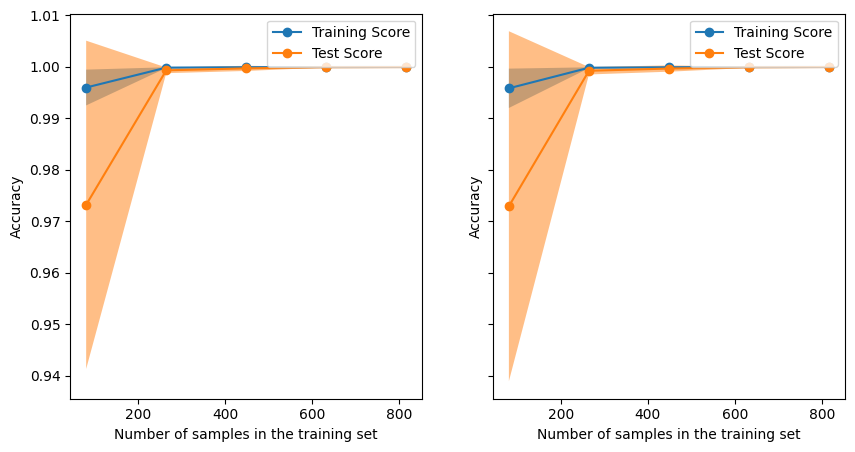

In [ ]:
#Loss Curves Before vs After

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

common_params = {
    "X": X,
    "y": Y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rfr, rfr2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])

In [ ]:
#v2
f = Forecaster(y=df['surface_temperature'],
                   current_dates=df['year'])

In [ ]:
#v2
f.plot_pacf(lags=26)
plt.show() #Result: statistically significant correlation may exist up to two years

In [ ]:
#v2
f.set_test_length(5)
f.generate_future_dates(5)
f.set_estimator('lstm')

In [ ]:
#v2
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

In [ ]:
#v2
f.manual_forecast(call_me='lstm',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

## Granger Causality

#### Test for non-stationary

In [ ]:
from pandas.plotting import lag_plot
   
f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(data['fertilizer_consumption'], ax=ax4)
ax4.set_title('fertilizer_consumption');

lag_plot(data['surface_temperature'], ax=ax5)
ax5.set_title('surface_temperature');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()

In [ ]:
for col in data.iloc[:,3:15].columns:
  print(col)
  X = data[col].values
  split = int(len(X) / 2)
  X1, X2 = X[0:split], X[split:]
  mean1, mean2 = X1.mean(), X2.mean()
  var1, var2 = X1.var(), X2.var()
  print('mean1=%f, mean2=%f' % (mean1, mean2))
  print('variance1=%f, variance2=%f' % (var1, var2))
  print('----------------------------------------------------')

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Time Series - Stationary Test", fontsize=20)

# loop through the length of tickers and keep track of index
for i, feature in enumerate(data.iloc[:,3:15].columns):
    ax = plt.subplot(4, 4, i + 1)
    data[feature].hist(ax=ax)
    ax.set_title(feature)
plt.savefig('/content/sample_data/feature_hist.png')

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Time Series - Stationary Test", fontsize=20)

# loop through the length of tickers and keep track of index
for i, feature in enumerate(data.iloc[:,3:15].columns):
    ax = plt.subplot(4, 4, i + 1)
    data[feature].hist(ax=ax)
    ax.set_title(feature)
plt.savefig('/content/sample_data/feature_hist.png')

In [ ]:
#Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
non_stationary = []

for col in data.iloc[:,3:15].columns:
  print(col)
  X = data[col].values
  result = adfuller(X)
  if(result[1] > 0.05):
    non_stationary.append(col)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

In [ ]:
#Label
X = data["surface_temperature"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('-----------------------------')

In [ ]:
#cointegration test

import statsmodels.tsa.stattools as ts 
for col in data.iloc[:,3:15]:
  print(col)
  result=ts.coint(data[col], data['surface_temperature'])
  print(result)
  print('-------------------------------')

In [ ]:
#non-stationary -> stationary using difference operation

for col in non_stationary:
  data[col] = data[col] - data[col].shift(1)
data = data.dropna()

In [ ]:
#Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

for col in non_stationary:
  print(col)
  X = data[col].values
  result = adfuller(X)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('-----------------------------')

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Time Series - Stationary Test", fontsize=20)

# loop through the length of tickers and keep track of index
for i, feature in enumerate(data.iloc[:,3:15].columns):
    ax = plt.subplot(4, 4, i + 1)
    data[feature].hist(ax=ax)
    ax.set_title(feature)
plt.savefig('/content/sample_data/feature_hist_post.png')

In [ ]:
#Granger Causality

from statsmodels.tsa.stattools import grangercausalitytests

for feature in data.columns[3:15]:
  print(feature)
  grangercausalitytests(data[[feature, 'surface_temperature']], maxlag=[1])
  print('--------------------------------------------')
  print("Reverse causality for " + feature)
  grangercausalitytests(data[['surface_temperature',feature]], maxlag=[1])
  print('--------------------------------------------')

In [ ]:
!python3 --version

Python 3.9.16


#### Hyperparameter Tuning

Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [147]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn import model_selection
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

cv = model_selection.KFold(n_splits=3)

count=0

for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  rf_random.fit(X_train, Y_train)
  best_random = rf_random.best_estimator_
  random_accuracy = evaluate(best_random, X_test, Y_test)

  print('Parameters currently in use:\n')
  pprint(rf_random.get_params())

  base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
  base_model.fit(X_train, Y_train)
  base_accuracy = evaluate(base_model, X_test, Y_test)

  if(count>1):
    break
  count+=1

print(random_accuracy)
print(base_accuracy)

print(best_random.get_params())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


NameError: ignored

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

regressor = DecisionTreeRegressor()

# Look at parameters used by our current forest


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

regressor = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

#cv = model_selection.KFold(n_splits=3)
reg_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
reg_random.fit(X_train, y_train.reshape(-1,1))
best_random = reg_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Parameters currently in use:\n')
pprint(reg_random.get_params())

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

print(random_accuracy)
print(base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

print(best_random.get_params())

Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn import model_selection
from pprint import pprint

svr = SVR(kernel = 'rbf')
cv = model_selection.KFold(n_splits=3)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

svr = SVR(kernel = 'rbf')

count=0
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  svr_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  svr_random.fit(X_train, Y_train)
  best_random = svr_random.best_estimator_
  random_accuracy = evaluate(best_random, X_test, Y_test)

  print('Parameters currently in use:\n')
  pprint(svr_random.get_params())

  base_model = SVR(kernel = 'rbf')
  base_model.fit(X_train, Y_train)
  base_accuracy = evaluate(base_model, X_test, Y_test)

  if(count>1):
    break
  count+=1

print(random_accuracy)
print(base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

print(best_random.get_params())

Lasso Regressor

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from pprint import pprint

lasso = linear_model.Lasso(alpha=0.005)
cv = model_selection.KFold(n_splits=3)

# Look at parameters used by our current forest


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

lasso = linear_model.Lasso(alpha=0.005)

count=0
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  lasso_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  lasso_random.fit(X_train, Y_train)
  best_random = lasso_random.best_estimator_
  random_accuracy = evaluate(best_random, X_test, Y_test)

  print('Parameters currently in use:\n')
  pprint(lasso_random.get_params())

  base_model = linear_model.Lasso(alpha=0.005)
  base_model.fit(X_train, Y_train)
  base_accuracy = evaluate(base_model, X_test, Y_test)

  if(count>1):
    break
  count+=1

print(random_accuracy)
print(base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [144]:
#Eval

#Decision Tree
print("Decision Tree")
y_pred = reg_random.predict(X_test)
eval_df = pd.DataFrame({'Real Values':Y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print(mean_squared_error(eval_df['Real Values'],eval_df['Predicted Values']))
print(mape(eval_df['Real Values'],eval_df['Predicted Values']))

#Random Forest
print("Random Forest Regressor")
Y_pred = rf_random.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))
print(mape(Y_test, Y_pred))

#Support Vector Regressor
print("Support Vector Regressor")
Y_pred = svr_random.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))
print(mape(Y_test, Y_pred))

#Lasso Regressor
print("Lasso Regressor")
Y_pred = lasso_random.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))
print(mape(Y_test, Y_pred))

Decision Tree
0.09479018408669115
2.022872523439872
Random Forest Regressor
29.41798268898085
64.64976258726676
Support Vector Regressor
29.600643301328486
63.21644922084979
Lasso Regressor
29.109747870577454
64.01210691303262
